## Geography 30323: Take-home exam #2

This second take home exam will continue to evaluate your skills in using Python for data analysis, with a focus on data wrangling and data visualization.  

The examination consists of a series of structured and semi-structured questions that you will answer with data analysis. In this examination, you will answer a series of questions which pertain to two different datasets I've provided for you. There is a total possible score of 100; your scores will then be weighted as this take-home examination constitutes 16 percent of your overall course grade.

Your responses to the following questions should consist of the following components:

1. The code used to answer the question, and any results you've produced;
2. Visualizations, when appropriate;
3. A short write-up in Markdown explaining what you did, and analyzing/interpreting your results when appropriate.

Responses that receive 80% credit and up will show evidence of effort beyond the minimum necessary to answer the question. This could include but is not limited to noticeable thoughtfulness in the interpretation of the data; responses that blend computation, visualization, and description quite well; or evidence of going beyond the basic parameters of the assignment.

This examination should be completed in this Jupyter Notebook, like your weekly assignments. It is due by the end of the day on __Tuesday, November 20__ for full credit, and will incur a 10 percent penalty (equivalent to 1.6 percent of your overall grade for the semester!) for each day it is submitted past the deadline.

This exam is more open-ended than Exam 1 - so take care with your responses!

### Part I: More with baby names!

In Assignment 9, you got practice working with the `babynames` dataset derived from the Social Security Administration.  In the first part of this take-home examination, you are going to extend your work in that assignment to answer a series of questions.  The dataset is available in your Exam 2 folder.  

__Question 1 (10 points):__ What were the ten most popular female baby names in the United States during the 1960s?  How did their popularity vary throughout the decade?  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # Turning off the "SettingWithCopyWarning"

df = pd.read_csv('babynames.csv')

df['year'] = df.year.astype('int')
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020522
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017889


In [2]:
female60 = df[(df.year == 1960) & (df.sex == 'F')]
female60sorted = female60.sort_values('n', ascending = False)
top_female = female60sorted[0:10] # [0:15]
name_list = top_female.name.tolist()

name_list

['Mary',
 'Susan',
 'Linda',
 'Karen',
 'Donna',
 'Lisa',
 'Patricia',
 'Debra',
 'Cynthia',
 'Deborah']

In [3]:
sub1 = df[(df.name.isin(name_list)) & (df.year > 1960) & (df.sex == 'F')]

sub1['per1000'] = sub1.prop * 1000

sub1.head(10)

,year,sex,name,n,prop,per1000
584374,1961,F,Mary,47669,0.022959,22.959458
584375,1961,F,Lisa,42700,0.020566,20.566172
584376,1961,F,Susan,37522,0.018072,18.072222
584377,1961,F,Linda,35574,0.017134,17.133981
584378,1961,F,Karen,34690,0.016708,16.708208
584379,1961,F,Patricia,28867,0.013904,13.903599
584380,1961,F,Donna,28667,0.013807,13.807270
584381,1961,F,Cynthia,24378,0.011742,11.741502
584383,1961,F,Deborah,24092,0.011604,11.603752
584386,1961,F,Debra,22152,0.010669,10.669364


In [4]:
sns.set_style("darkgrid")
popularNames = ['Mary', 'Lisa', 'Susan', 'Linda', 'Karen', 'Patricia', 'Donna', 'Cynthia', 'Deborah', 'Debra']

popularNames_df = df[(df.name.isin(popularNames)) & (df.sex == 'F') & (df.year > 1960)]

popularNames_df['per1000'] = popularNames_df.prop * 1000

popularNames_df.head()



,year,sex,name,n,prop,per1000
584374,1961,F,Mary,47669,0.022959,22.959458
584375,1961,F,Lisa,42700,0.020566,20.566172
584376,1961,F,Susan,37522,0.018072,18.072222
584377,1961,F,Linda,35574,0.017134,17.133981
584378,1961,F,Karen,34690,0.016708,16.708208


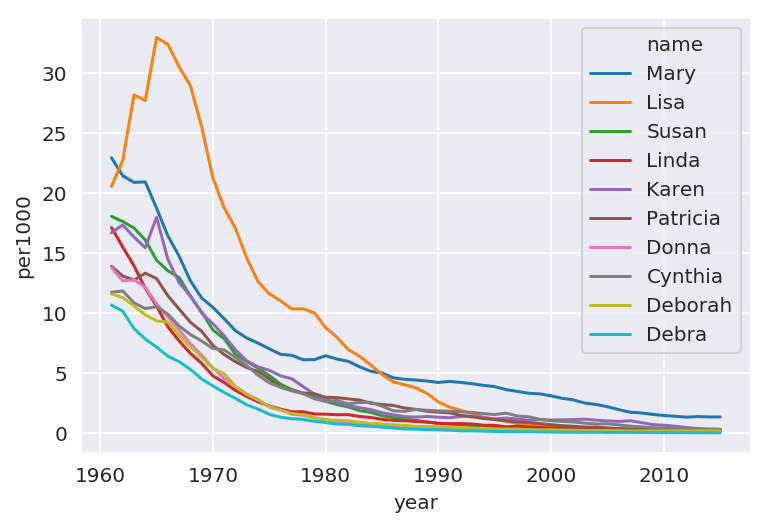

In [5]:
sns.lineplot(data = popularNames_df, x = "year", y = "per1000", hue = "name")

<!---
What were the ten most popular female baby names in the United States during the 1960s? How did their popularity vary throughout the decade?
-->

The ten most popular names in the United States during the 1960s where *Mary*, *Lisa*, *Susan*, *Linda*, *Karen*, *Patricia*, *Donna*, *Cynthia*, *Deborah*, *Debra*. Lisa's name was predominantly the most popular name throughout the decade, followed by Mary, Karen, Susan, Linda, Patricia, Donna, Cynthia, Deborah, and finally Debra. Mary, Karen, and Lisa peaked on the curve near the middle of the decade but fell shortly right after. Lisa is the outlier of the names because that name peaked twice in the 60s. As seen on the lineplot Mary is the line with the color blue, Karen is the line with the purple line, and  Lisa is the line wiht the color orange. 



__Question 2 (10 points):__ For each decade since 1950, what were the most popular (the number one) male and female baby names?  

#### Female number One baby name 

In [6]:
female50 = df[(df.year == 1950) & (df.sex == 'F')]
female50sorted = female50.sort_values('n', ascending = False)
top_female = female50sorted[0:10] # [0:15]
name_list = top_female.name.tolist()

name_list

['Linda',
 'Mary',
 'Patricia',
 'Barbara',
 'Susan',
 'Nancy',
 'Deborah',
 'Sandra',
 'Carol',
 'Kathleen']

In [7]:
# 10 years is a decade
sub1 = df[(df.name.isin(name_list)) & (df.year > 1950) & (df.sex == 'F')]

sub1['per1000'] = sub1.prop * 1000

sub1.head(10)

,year,sex,name,n,prop,per1000
472233,1951,F,Linda,73947,0.040043,40.043495
472234,1951,F,Mary,65693,0.035574,35.573820
472235,1951,F,Patricia,56433,0.030559,30.559381
472236,1951,F,Deborah,42045,0.022768,22.768046
472237,1951,F,Barbara,40596,0.021983,21.983390
472238,1951,F,Susan,40214,0.021777,21.776530
472239,1951,F,Nancy,30340,0.016430,16.429600
472241,1951,F,Sandra,27657,0.014977,14.976712
472242,1951,F,Kathleen,26709,0.014463,14.463355
472243,1951,F,Carol,24777,0.013417,13.417146


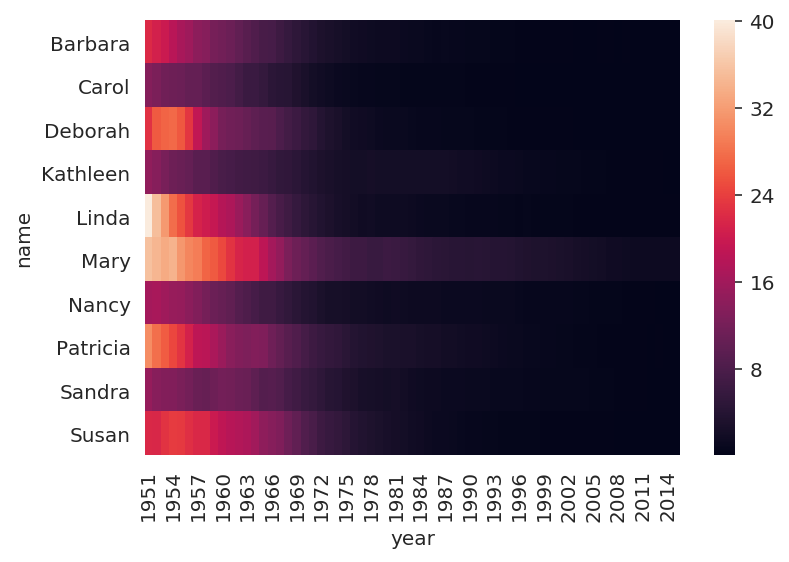

In [8]:
wide1 = sub1.pivot(index = 'name', columns = 'year', values = 'per1000')

sns.heatmap(wide1)

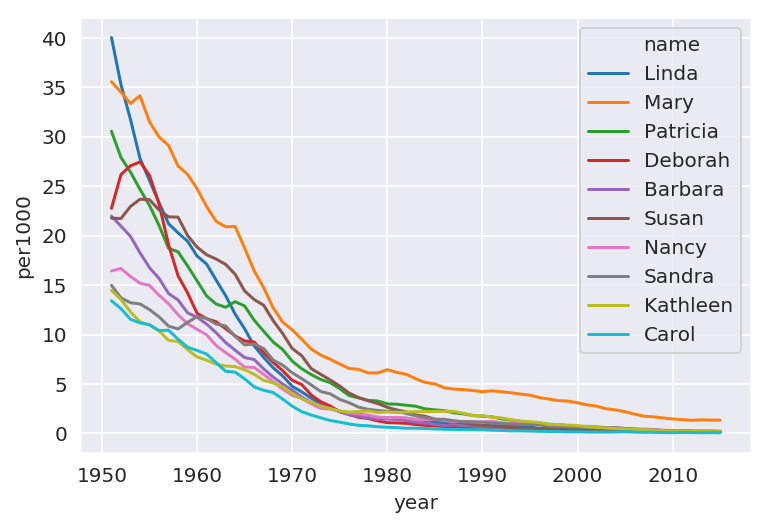

In [9]:
sns.lineplot(data = sub1, x = "year", y = "per1000", hue = "name")

|**Gender**| 1950 | 1960 |1970|1980|1990|2000|2010
|-----------| ----------- | ----------- |---------- |---------- |---------- |---------- |----------
|**Female**| Linda | Mary |Mary|Mary |Mary|Mary |Mary|


The female name that was popular in the 50s was Linda. The majority of the other decades that include the 60s, 70s, 90s, 00s, and 10s has consistently been Mary. As you can see from the lineplot graph the name peaked between the 50s and 60s then dipped. Around the 60s up until 65 the name remained steady then dipped. After the 80s the name remined constant  for the reminder of the decades up until 10s. 

#### Male number One baby name 

In [10]:
male50 = df[(df.year == 1950) & (df.sex == 'M')]
male50sorted = male50.sort_values('n', ascending = False)
top_male = male50sorted[0:10] # [0:15]
namelist = top_male.name.tolist()

namelist

['James',
 'Robert',
 'John',
 'Michael',
 'David',
 'William',
 'Richard',
 'Thomas',
 'Charles',
 'Gary']

In [11]:
sub2 = df[(df.name.isin(namelist)) & (df.year > 1950) & (df.sex == 'M')]

sub2['per1000'] = sub2.prop * 1000

sub2.head(10)

,year,sex,name,n,prop,per1000
478446,1951,M,James,87198,0.045639,45.639353
478447,1951,M,Robert,86324,0.045182,45.181902
478448,1951,M,John,81529,0.042672,42.672204
478449,1951,M,Michael,72769,0.038087,38.087228
478450,1951,M,David,64761,0.033896,33.895848
478451,1951,M,William,62752,0.032844,32.844339
478452,1951,M,Richard,54520,0.028536,28.535718
478453,1951,M,Thomas,48246,0.025252,25.251912
478454,1951,M,Charles,39365,0.020604,20.603605
478455,1951,M,Gary,38140,0.019962,19.962441


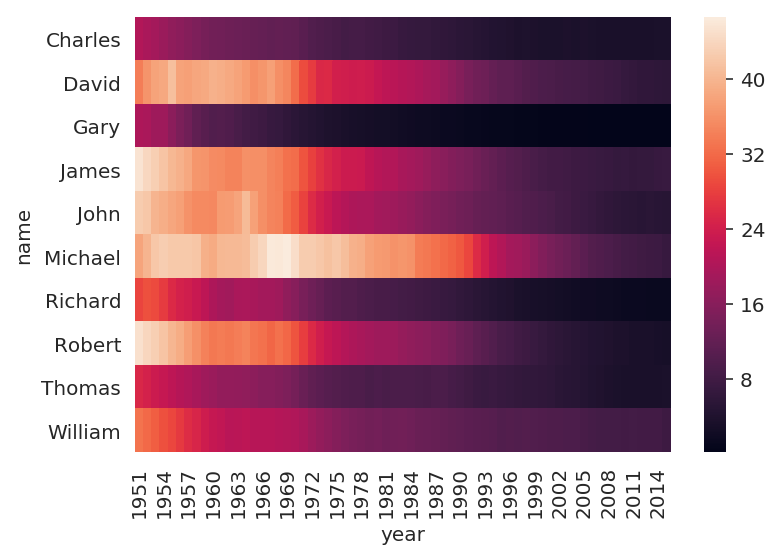

In [12]:
wide1 = sub2.pivot(index = 'name', columns = 'year', values = 'per1000')

sns.heatmap(wide1)

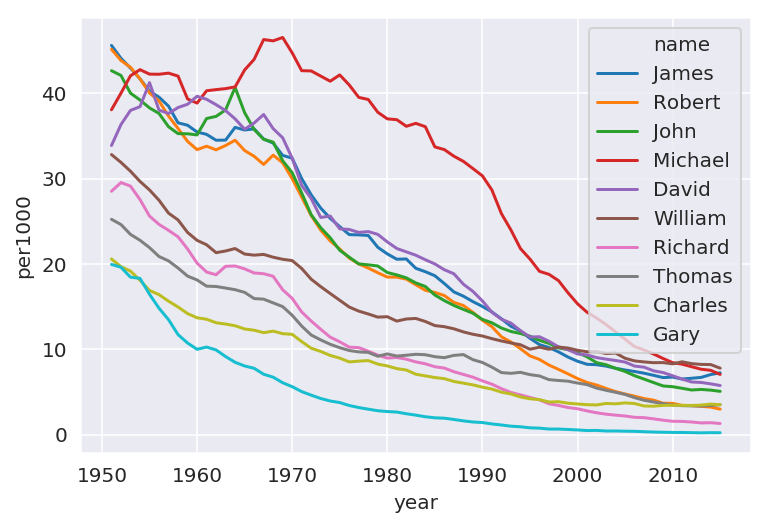

In [13]:
sns.lineplot(data = sub2, x = "year", y = "per1000", hue = "name")

|**Gender**| 1950 | 1960 |1970|1980|1990|2000|2010
|-----------| ----------- | ----------- |---------- |---------- |---------- |---------- |----------
|**Male**| James | David |Michael| Michael |Michael|Michael |Michael| 

Although Michael was a popular name in the 2000s William was also paired along side Michael that decade. Michael remained steady between the 50s and 60s then took a dip in the 60s. The name peaked during the middle of the 60s. Looking at the lineplot Michael seems to be the outlier of the nmes this would have to do wiht the popluarity of the name. I would guess that the reason for the name being an outlier would be due to The Godfather movies, starting with the first one. Since the film was made in 1972 there seems to be a correlation in the linplot with that year this is also consistent with the The Godfather Part 2 which debuted in 1974, the namepeked around that time. The name remained popluar throughout the decades but dipped during the 90s this might have been contributed with the release of The Godfather Part 3. 


__Question 3 (10 points):__ Choose one name - male or female - and trace its popularity since 1880.  When did the name you've chosen "peak" in popularity?  What trends over time do you observe in its popularity, and how might you explain them?  

In [14]:
# John
sns.set_style("darkgrid")
chosenName = ['John']

chosenName_df = df[(df.name.isin(chosenName)) & (df.sex == 'M') & (df.year > 1880)]

chosenName_df['per1000'] = chosenName_df.prop * 1000

chosenName_df.head()

,year,sex,name,n,prop,per1000
2938,1881,M,John,8769,0.080983,80.982989
4963,1882,M,John,9557,0.078316,78.316166
7116,1883,M,John,8894,0.079073,79.073241
9318,1884,M,John,9388,0.076488,76.487506
11640,1885,M,John,8756,0.075518,75.517914


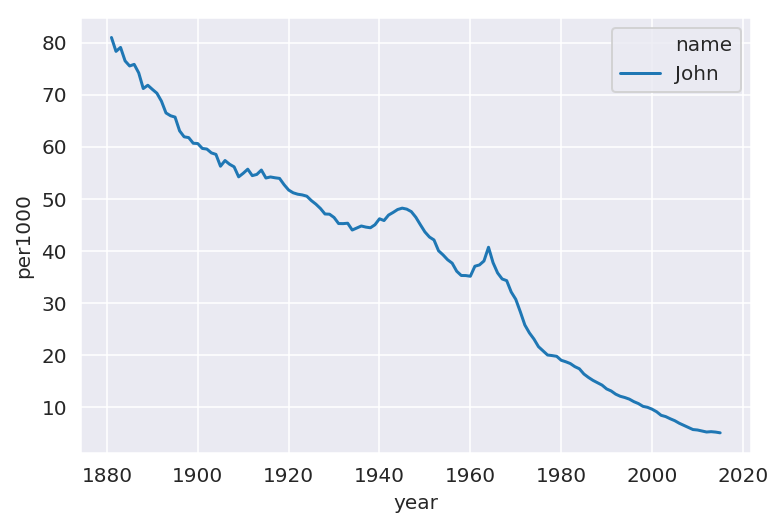

In [15]:

sns.lineplot(data = chosenName_df, x = "year", y = "per1000", hue = "name")

The peak of the popularity of the name John occurred in the 1880s the name has dipped ever since. There was a peak in the popularity of the name between the 1940s to 1960/70s. The trend/peak might have contributed due the significants those timesframes becuase of the presidency of John F. Kennedy and Lyndon Johnson. During those timeframes there where a couple of historic events that occurred in U.S. inlcuding the Assasination of President Kennedy, Lyndon Johnson presidency, and the U.S. involvement in the Vietnam war. 


__Question 4 (20 points):__  Certain names wax and wane in popularity over time; for example, some names that were very popular in the early 1900s are rarely seen today.  However, some names have had remarkable staying power over time.  Design an analysis to identify those names that have been the most consistently popular throughout the dataset.  

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # Turning off the "SettingWithCopyWarning"

df = pd.read_csv('babynames.csv')

df['year'] = df.year.astype('int')
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020522
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017889


### Analysis of Female names popularity througout the dataset

In [17]:
popularNames = df[(df.year == 1900) & (df.sex == 'F')]
popularNamesSorted = popularNames.sort_values('n', ascending = False)
topPopularNames = popularNamesSorted[0:10] # [0:15]
name_list = topPopularNames.name.tolist()

name_list


['Mary',
 'Helen',
 'Anna',
 'Margaret',
 'Ruth',
 'Elizabeth',
 'Florence',
 'Ethel',
 'Marie',
 'Lillian']

In [18]:
sub3 = df[(df.name.isin(name_list)) & (df.year > 1900)]

sub3['per1000'] = sub3.prop * 1000

sub3.head(10)

,year,sex,name,n,prop,per1000
55996,1901,F,Mary,13136,0.051669,51.669341
55997,1901,F,Helen,5247,0.020639,20.638629
55998,1901,F,Anna,4923,0.019364,19.364203
55999,1901,F,Margaret,4424,0.017401,17.401429
56000,1901,F,Ruth,3974,0.015631,15.631392
56001,1901,F,Elizabeth,3216,0.012650,12.649863
56002,1901,F,Marie,3157,0.012418,12.417792
56003,1901,F,Florence,3131,0.012316,12.315523
56004,1901,F,Ethel,3067,0.012064,12.063784
56005,1901,F,Lillian,2681,0.010545,10.545486


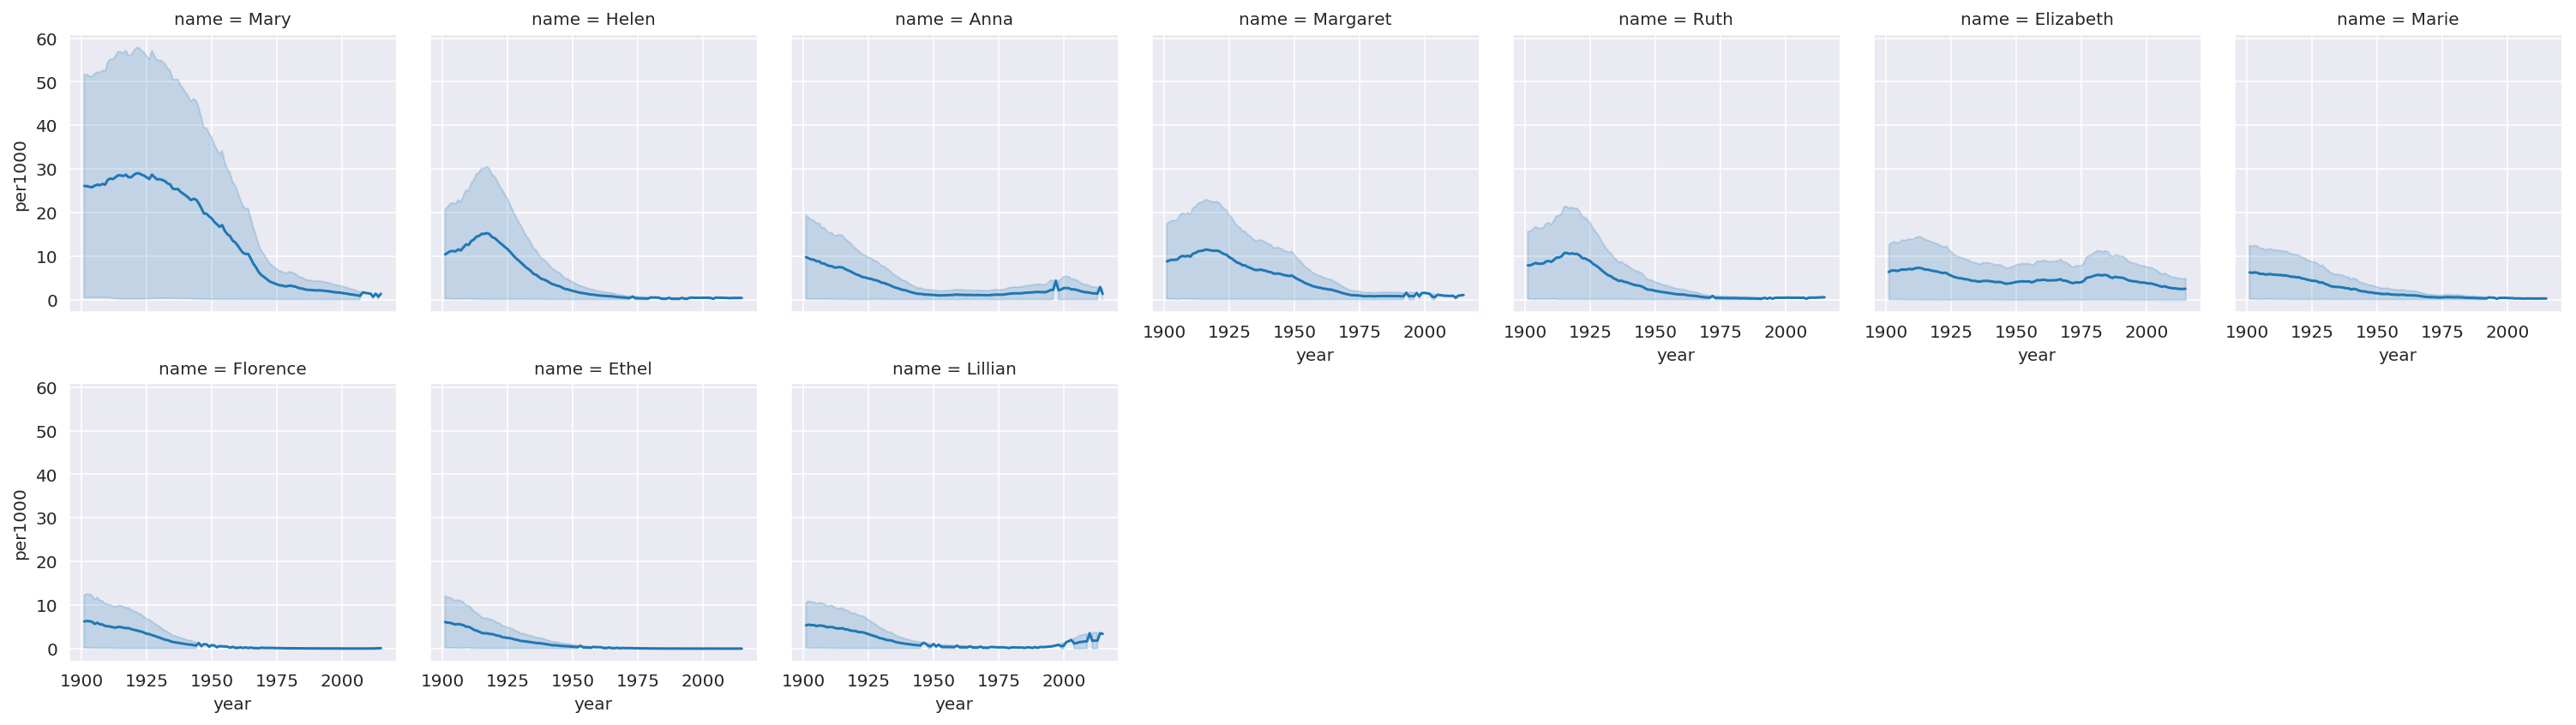

In [19]:

facets = sns.FacetGrid(sub3, col = "name", col_wrap = 7)
facets.map(sns.lineplot, "year", "per1000")

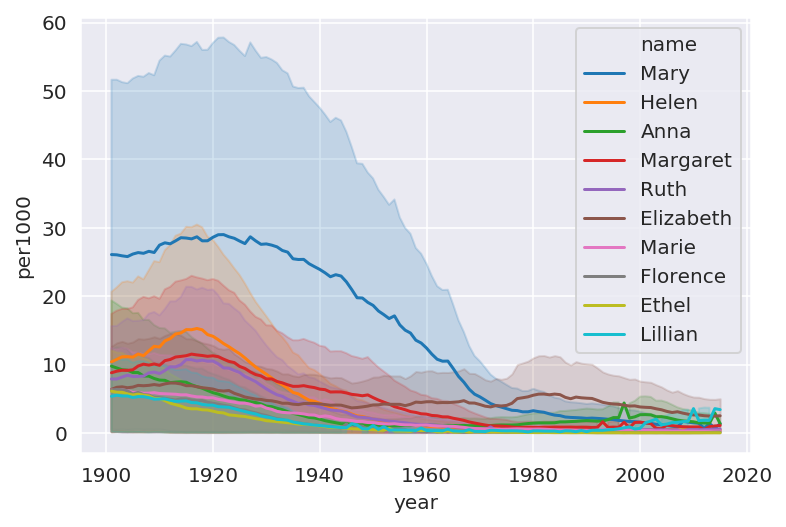

In [20]:
sns.lineplot(data = sub3, x = "year", y = "per1000", hue = "name")

In [21]:

sub3["year"] = sub3["year"].astype(int)


sub3["names2"] = sub3.name.where(sub3.name == "Elizabeth", "Other")


sub3.sort_values("names2", ascending = False, inplace = True)

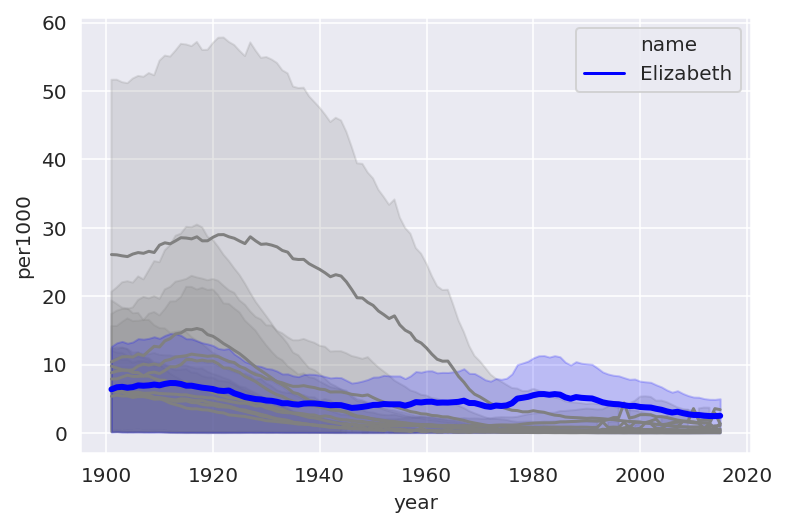

In [22]:

for c in sub3.name.unique():
    sub = sub3[sub3.name == c]
    if c != "Elizabeth":
        sns.lineplot(data = sub, x = "year", y = "per1000", 
                     hue = "name", palette = ["grey"], legend = False)
    else: 
        sns.lineplot(data = sub, x = "year", y = "per1000", 
                     hue = "name", palette = ["blue"], 
                     linewidth = 3)

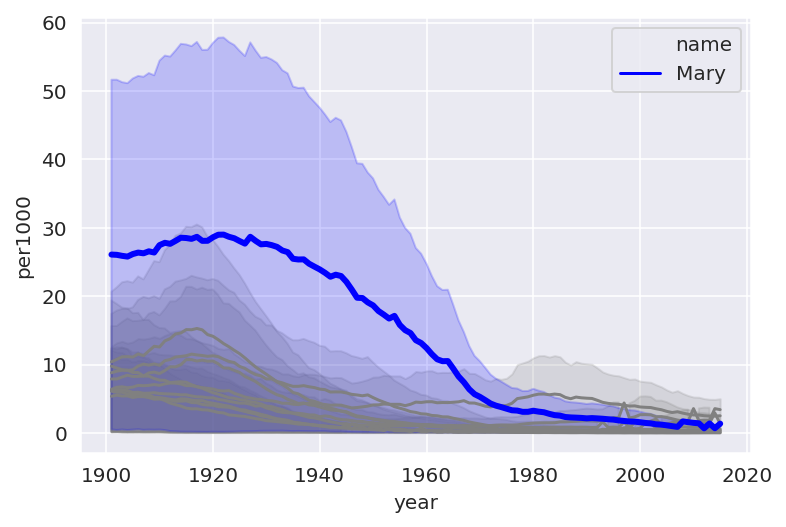

In [23]:

sub3["year"] = sub3["year"].astype(int)


sub3["names2"] = sub3.name.where(sub3.name == "Mary", "Other")


sub3.sort_values("names2", ascending = False, inplace = True)


for c in sub3.name.unique():
    sub = sub3[sub3.name == c]
    if c != "Mary":
        sns.lineplot(data = sub, x = "year", y = "per1000", 
                     hue = "name", palette = ["grey"], legend = False)
    else: 
        sns.lineplot(data = sub, x = "year", y = "per1000", 
                     hue = "name", palette = ["blue"], 
                     linewidth = 3)

<!---
Certain names wax and wane in popularity over time; for example, some names that were very popular in the early 1900s are rarely seen today. However, some names have had remarkable staying power over time. Design an analysis to identify those names that have been the most consistently popular throughout the dataset.
-->

The names that have had the constant popularity are *Mary* and *Elizabeth*. Elizabeth has stayed constant throughout the dataset. As for Mary, it's peaked reached 1900 up until 1950s then dipped but remained steady throughout the decades to follow within the dataset.  

### Analysis of Male names popularity througout the dataset

In [24]:
popularNames2 = df[(df.year == 1900) & (df.sex == 'M')]
popularNames2Sorted = popularNames2.sort_values('n', ascending = False)
topPopularNames2 = popularNames2Sorted[0:10] # [0:15]
name_list2 = topPopularNames2.name.tolist()

name_list2

['John',
 'William',
 'James',
 'George',
 'Charles',
 'Robert',
 'Joseph',
 'Frank',
 'Edward',
 'Henry']

In [25]:

sub4 = df[(df.name.isin(name_list2)) & (df.year > 1900)]

sub4['per1000'] = sub4.prop * 1000

sub4.head(10)

,year,sex,name,n,prop,per1000
56480,1901,F,John,39,0.000153,0.153403
56540,1901,F,William,32,0.000126,0.125869
56562,1901,F,James,30,0.000118,0.118002
56602,1901,F,George,27,0.000106,0.106202
56660,1901,F,Charles,23,0.000090,0.090469
56703,1901,F,Frank,21,0.000083,0.082602
56803,1901,F,Henry,17,0.000067,0.066868
56845,1901,F,Robert,16,0.000063,0.062935
56895,1901,F,Joseph,14,0.000055,0.055068
57939,1901,M,John,6899,0.059683,59.682512


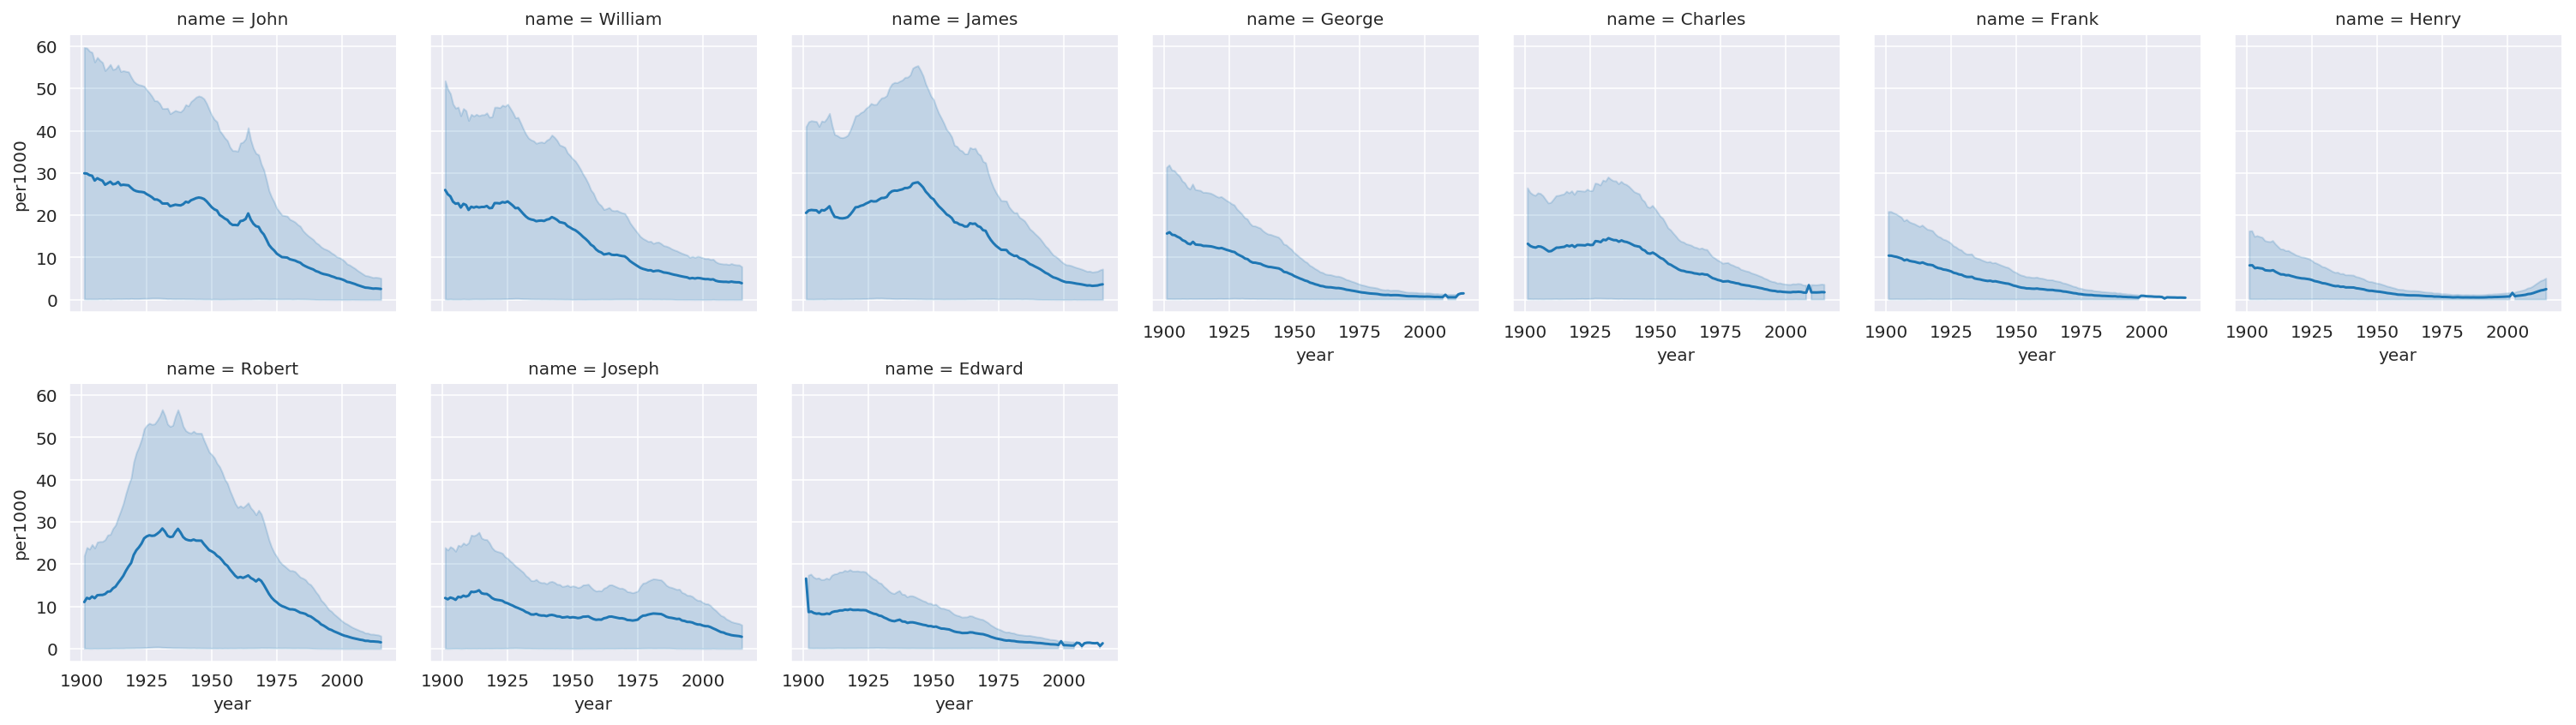

In [26]:

facets = sns.FacetGrid(sub4, col = "name", col_wrap = 7)
facets.map(sns.lineplot, "year", "per1000")

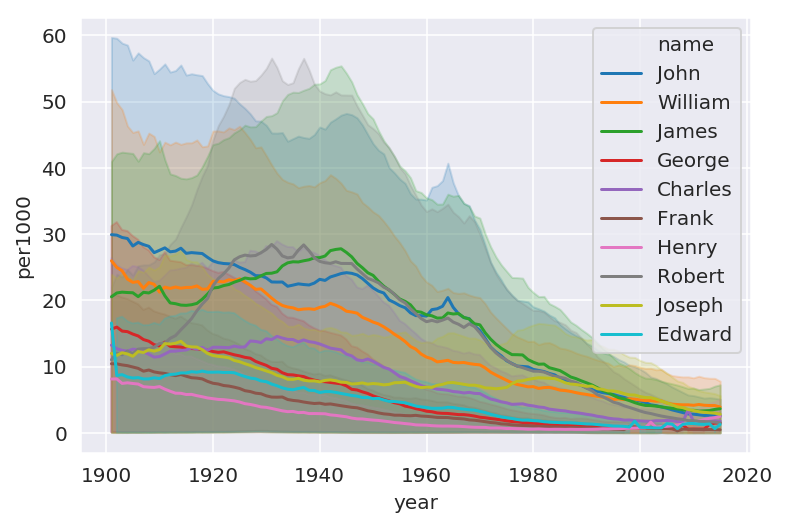

In [27]:
sns.lineplot(data = sub4, x = "year", y = "per1000", hue = "name")

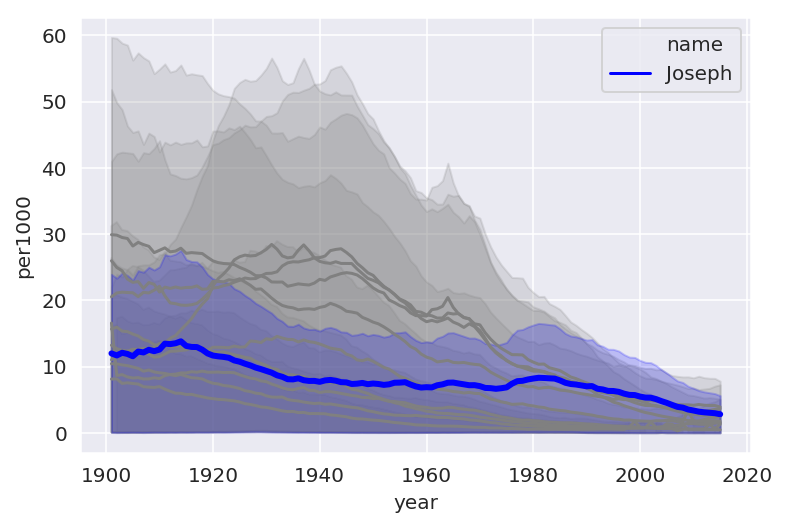

In [28]:

sub4["year"] = sub4["year"].astype(int)


sub4["names2"] = sub4.name.where(sub4.name == "Joseph", "Other")


sub4.sort_values("names2", ascending = False, inplace = True)


for c in sub4.name.unique():
    sub = sub4[sub4.name == c]
    if c != "Joseph":
        sns.lineplot(data = sub, x = "year", y = "per1000", 
                     hue = "name", palette = ["grey"], legend = False)
    else: 
        sns.lineplot(data = sub, x = "year", y = "per1000", 
                     hue = "name", palette = ["blue"], 
                     linewidth = 3)

<!---
Certain names wax and wane in popularity over time; for example, some names that were very popular in the early 1900s are rarely seen today. However, some names have had remarkable staying power over time. Design an analysis to identify those names that have been the most consistently popular throughout the dataset.
-->

The names that have had a constant popularity of time have been John, Williams, James, Charles, and Joseph. Similar to Elizabeth, Joseph has been constant throughout the dataset and the line plot shows only two peaks one in the 1900s - 1920s and the other 1980s. 

***
***
***

### Part II: The Ebola epidemic of 2014-2015

In the second part of this exam, you'll be analyzing data regarding the 2014-2015 Ebola outbreak in West Africa.  You may already be familiar with some of the details; however, it might be useful for you to familiarize yourselves with the epidemic from the following links: 

* Wikipedia: https://en.wikipedia.org/wiki/Ebola_virus_epidemic_in_West_Africa
* CDC: http://www.cdc.gov/vhf/ebola/outbreaks/2014-west-africa/
* World Health Organization: http://www.who.int/csr/disease/ebola/en/

You'll be working with a dataset compiled from WHO data on the Ebola outbreak and made available via the Humanitarian Data Exchange (https://data.humdata.org/).  The dataset itself comes from the following page: https://data.humdata.org/dataset/ebola-cases-2014 and has four columns: 

* `Indicator`: The type of information represented by the row, in regards to the Ebola outbreak.  __A note:__ not every indicator is represented for every country at every date in the dataset.   
* `Country`: The country corresponding to the row; 

A key note from the dataset description about the countries contained in the dataset: 
> Total number of probable, confirmed and suspected Ebola cases and deaths in Guinea, Liberia, Sierra Leone, Nigeria, Senegal, Mali, Spain USA, UK and Italy according to Ebola Data and Statistics.
> The resources contain two references to Liberia: Liberia and Liberia 2. Liberia contain cases reported before May 9, 2015. Liberia 2 refers to cases reported after May 9, 2015.
> The resources contain two references to Guinea: Guinea and Guinea 2. Guinea contain cases reported before May 9, 2015. Guinea 2 refers to cases reported after March 23, 2016.

Pay attention to this, as "Liberia 2" and "Guinea 2" refer to when Ebola re-appeared in these countries after the original outbreak.

* `Date`: The date corresponding to the record, in YYYY-MM-DD format.   
* `value`: The number of cases represented by the record.  

I'll give you a little help reading in the file.  While it is fairly straightforward, you are going to use a new parameter in `pd.read_csv()`, `parse_dates`, to tell `pandas` to automatically recognize the values in the `Date` field as dates.  Run the cell below to get started and generate a new data frame named `df`.  

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb

df = pd.read_csv('ebola.csv', parse_dates = ['Date'])

In [3]:
df.head()



,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


Certainly, there is ample information about the Ebola outbreak online, including data analyses and visualizations.  You are welcome to use those visualizations and that information to inspire your responses.  However, your responses themselves must be generated by you in Python with replicable Python code.  

Take care with your responses.  As mentioned above, not all indicators are available for every country at each date.  Further, some indicators are only measured at specific time intervals.  Also: make sure you understand what the different indicators represent before performing operations with them or using them in an analysis.  

__Question 5 (10 points):__  Explain the basic characteristics of the dataset.  What "shape" is the dataset in?  What information is contained in the dataset?  What does each row of the dataset represent?  

In [4]:
df.shape

(17585, 4)

The shape of the data set is **(17585, 4)** this is comprised of 4 columns and 17585 rows.

The dataset shows information about the Ebola outbreak. The columns consist of the Indicator, Country, Data, and Value. 
There are different indicators of the Ebola outbreak. The country listed shows that specifc country that the Ebola outbreak occurred. The value is the number of cases represented by the record. The dataset descriptions include the *count* with a value of 17585.000000. the *mean* with a value of 955.857987, the *standard deviation* of 2313.569259, the *min* with 0.000000, *25%* 0.000000, *50%* 1.000000, *75%*  287.000000 and a *max* of 14122.000000. 

In [5]:
df.describe()

,value
count,17585.000000
mean,955.857987
std,2313.569259
min,0.000000
25%,0.000000
50%,1.000000
75%,287.000000
max,14122.000000


Each row in the dataset shows information about the Ebola outbreak. The rows are comprised of the following:

**Cumulative number of**

**Number of**

**Proportion of**

**Case fatality rate (CFR)**

The rows detail information about the confirmed, probable, suspected, and information about the deaths from the outbreak. 

In [6]:
df.Indicator.unique()

array(['Cumulative number of confirmed, probable and suspected Ebola cases',
       'Cumulative number of confirmed Ebola cases',
       'Cumulative number of probable Ebola cases',
       'Cumulative number of suspected Ebola cases',
       'Cumulative number of confirmed, probable and suspected Ebola deaths',
       'Cumulative number of confirmed Ebola deaths',
       'Cumulative number of probable Ebola deaths',
       'Cumulative number of suspected Ebola deaths',
       'Number of confirmed Ebola cases in the last 21 days',
       'Number of confirmed, probable and suspected Ebola cases in the last 21 days',
       'Number of probable Ebola cases in the last 21 days',
       'Number of confirmed Ebola cases in the last 7 days',
       'Number of probable Ebola cases in the last 7 days',
       'Number of suspected Ebola cases in the last 7 days',
       'Number of confirmed, probable and suspected Ebola cases in the last 7 days',
       'Proportion of confirmed Ebola cases that a

__Question 6 (20 points):__  Describe the overall global characteristics of the Ebola epidemic, using the information available to you in the dataset.  Questions you could address include: How many people have been infected during the epidemic?  How many people have died?  Globally, when did the epidemic "peak"?  Pursue any other analyses you feel would be interesting and relevant to this question.  

### How many people have been infected during the epidemic?

In [7]:
infectedEpidemic = ['Cumulative number of confirmed Ebola cases']

infectedEpidemic_df = df[(df.Indicator.isin(infectedEpidemic))]

infectedEpidemic_df['value'].sum()

3568555.0

### How many people have died?

In [8]:
cfr = ['Cumulative number of confirmed Ebola deaths']

cfr_df = df[(df.Indicator.isin(cfr))]

cfr_df.head(10)
cfr_df['value'].sum()

1288179.0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


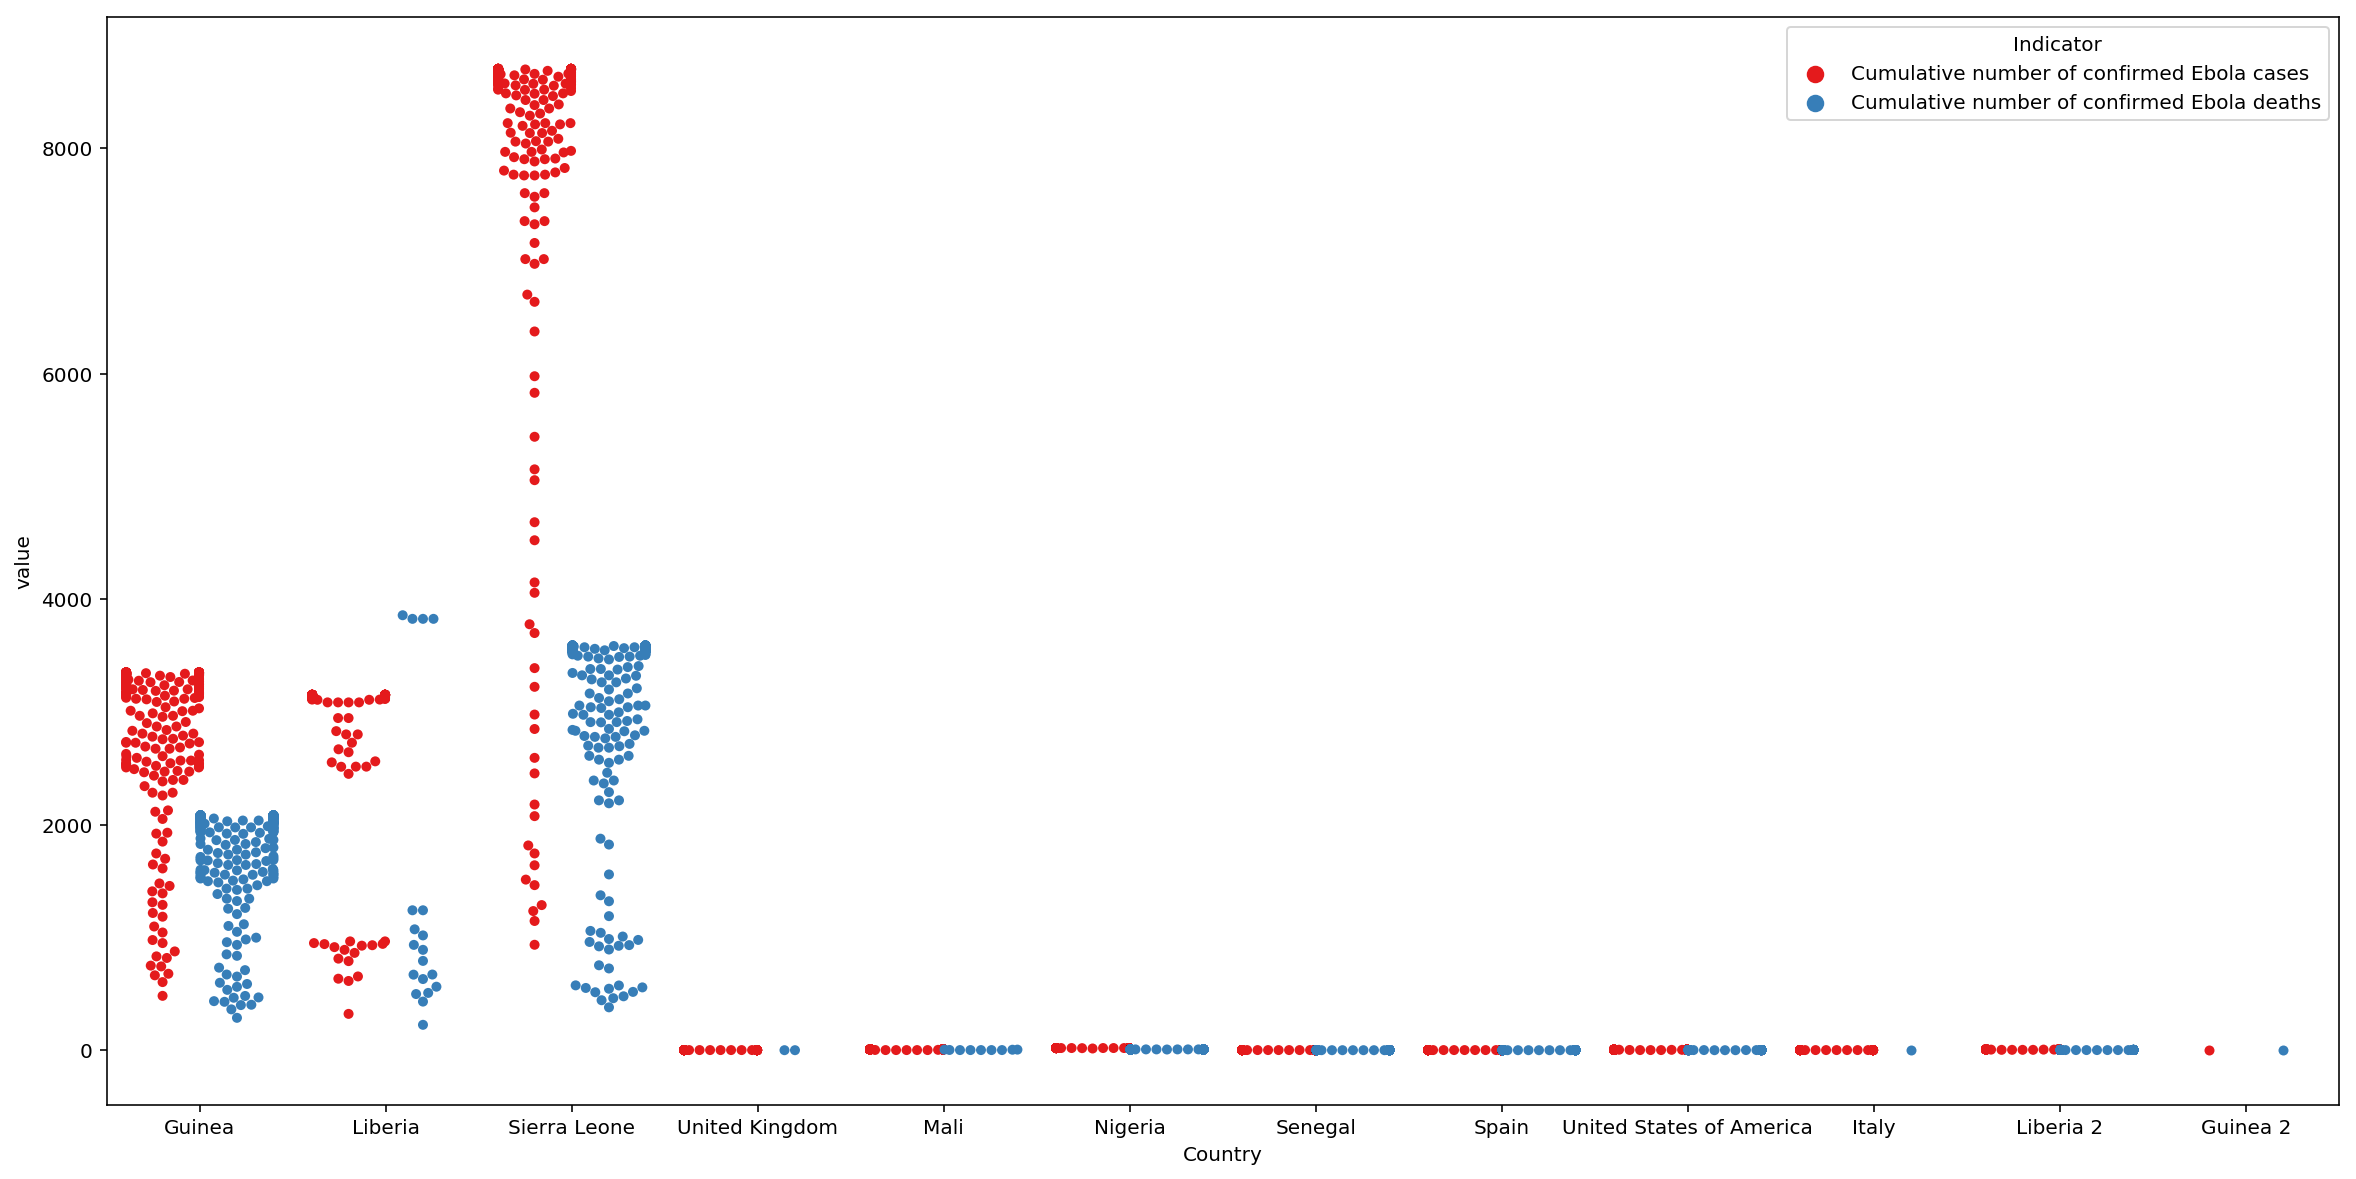

In [19]:
anaylsis = ['Cumulative number of confirmed Ebola deaths', 'Cumulative number of confirmed Ebola cases']

anaylsis_df = df[(df.Indicator.isin(anaylsis))]

plt.rcParams['figure.figsize'] = [20, 10]
sns.swarmplot(x="Country",y="value",hue='Indicator',data=anaylsis_df,palette="Set1", split=True)

### Globally, when did the epidemic "peak"?

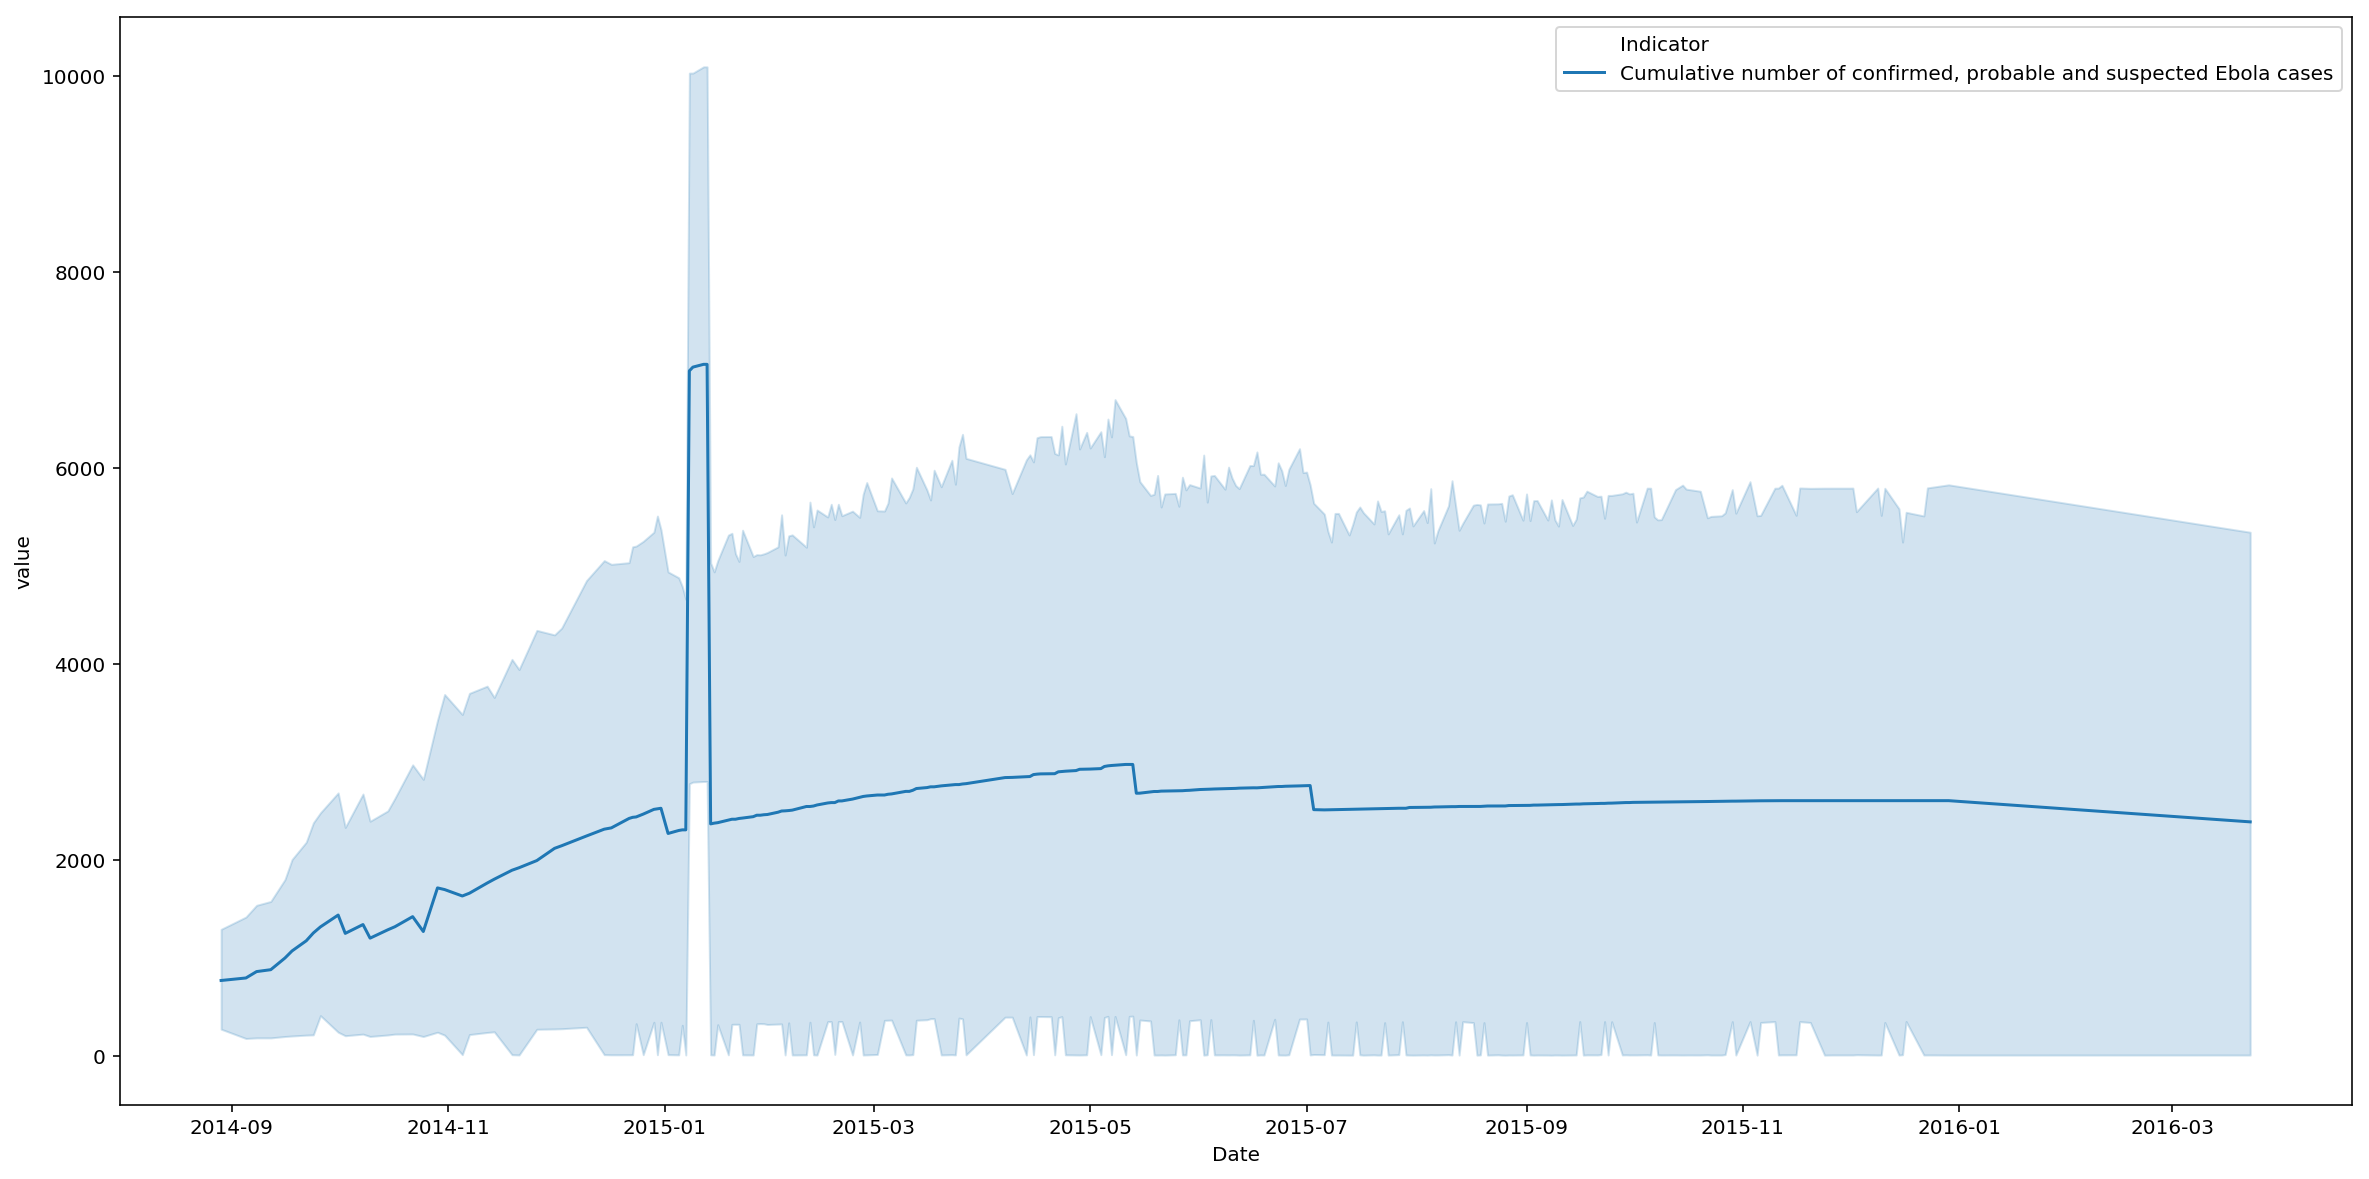

In [10]:
globalPeak = ['Cumulative number of confirmed, probable and suspected Ebola cases']

globalPeak_df = df[(df.Indicator.isin(globalPeak))]

globalPeak_df.head(10)

plt.rcParams['figure.figsize'] = [20, 10]
sns.lineplot(data = globalPeak_df, x = "Date", y = "value", hue = "Indicator")


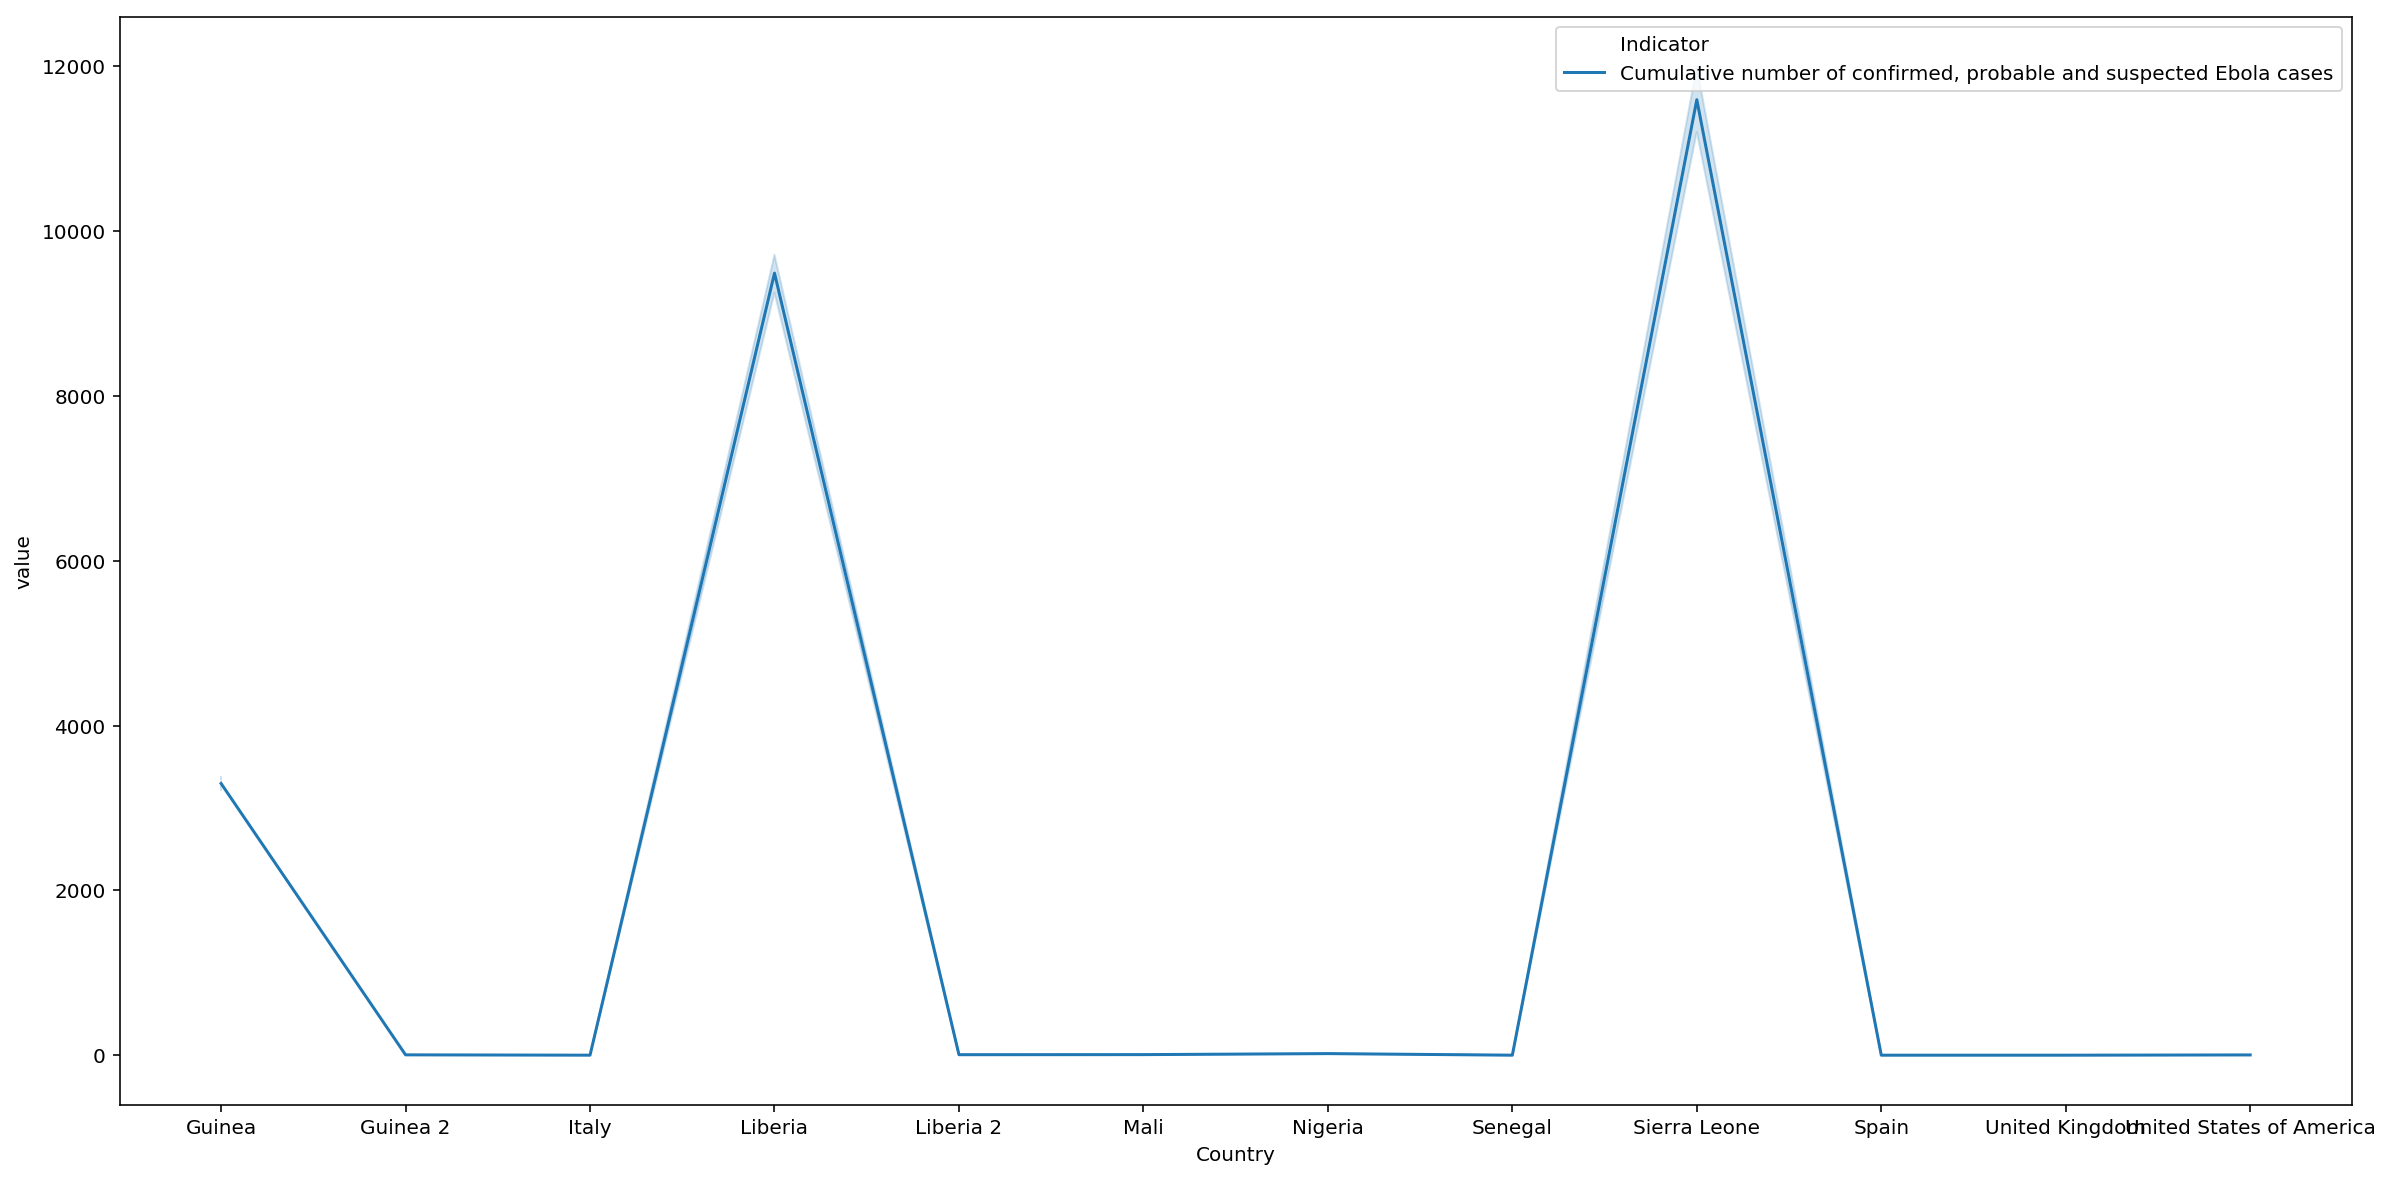

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.lineplot(data = globalPeak_df, x = "Country", y = "value", hue = "Indicator")

Information about the Ebola outbreak from the dataset shows a couple of variables that indicate the number of people that had been infected during the outbreak. The total number of infected were *3568555.0*. The death toll form the outbreak reached a number of *1288179.0*. Looking at the data from the swarmlpot the countries that were hit the hardest were *Guinea*, *Liberia*, and *Sierra Leone*. The plot shows Sierra Leone with the majority of the reported values of confirmed cases and deaths. The swarm for the confirmed deaths peaked between the values of 2000 & 4000 and the peak of the confirmed cases peaked between 7500 & 8600. Globally the outbreak peaked for Liberia and as mentioned Sierra Leone. The peak was more visible in the dataset for the date of *2015-01* 

###  Other analysis relevant to this question
##### What is the sum of the proportion of Ebola cases in the last 21 days ?



In [12]:
proportion = ['Proportion of confirmed Ebola cases that are from the last 21 days']

proportion_df = df[(df.Indicator.isin(proportion))]

proportion_df.head(10)
proportion_df['value'].sum()

1798.8

__Question 7 (20 points):__  Focus in this question on the three countries most impacted by the Ebola outbreak: Guinea, Sierra Leone, and Liberia.    

Your job is to conduct a comparative analysis of the Ebola outbreak in these three countries.  The parameters of your response are up to you; however, you might consider looking at how the scale of the outbreak varied between the countries; when the epidemic appears to have "peaked" in each country; and how cumulative and new cases in the three countries varied over time.  

### Peaked

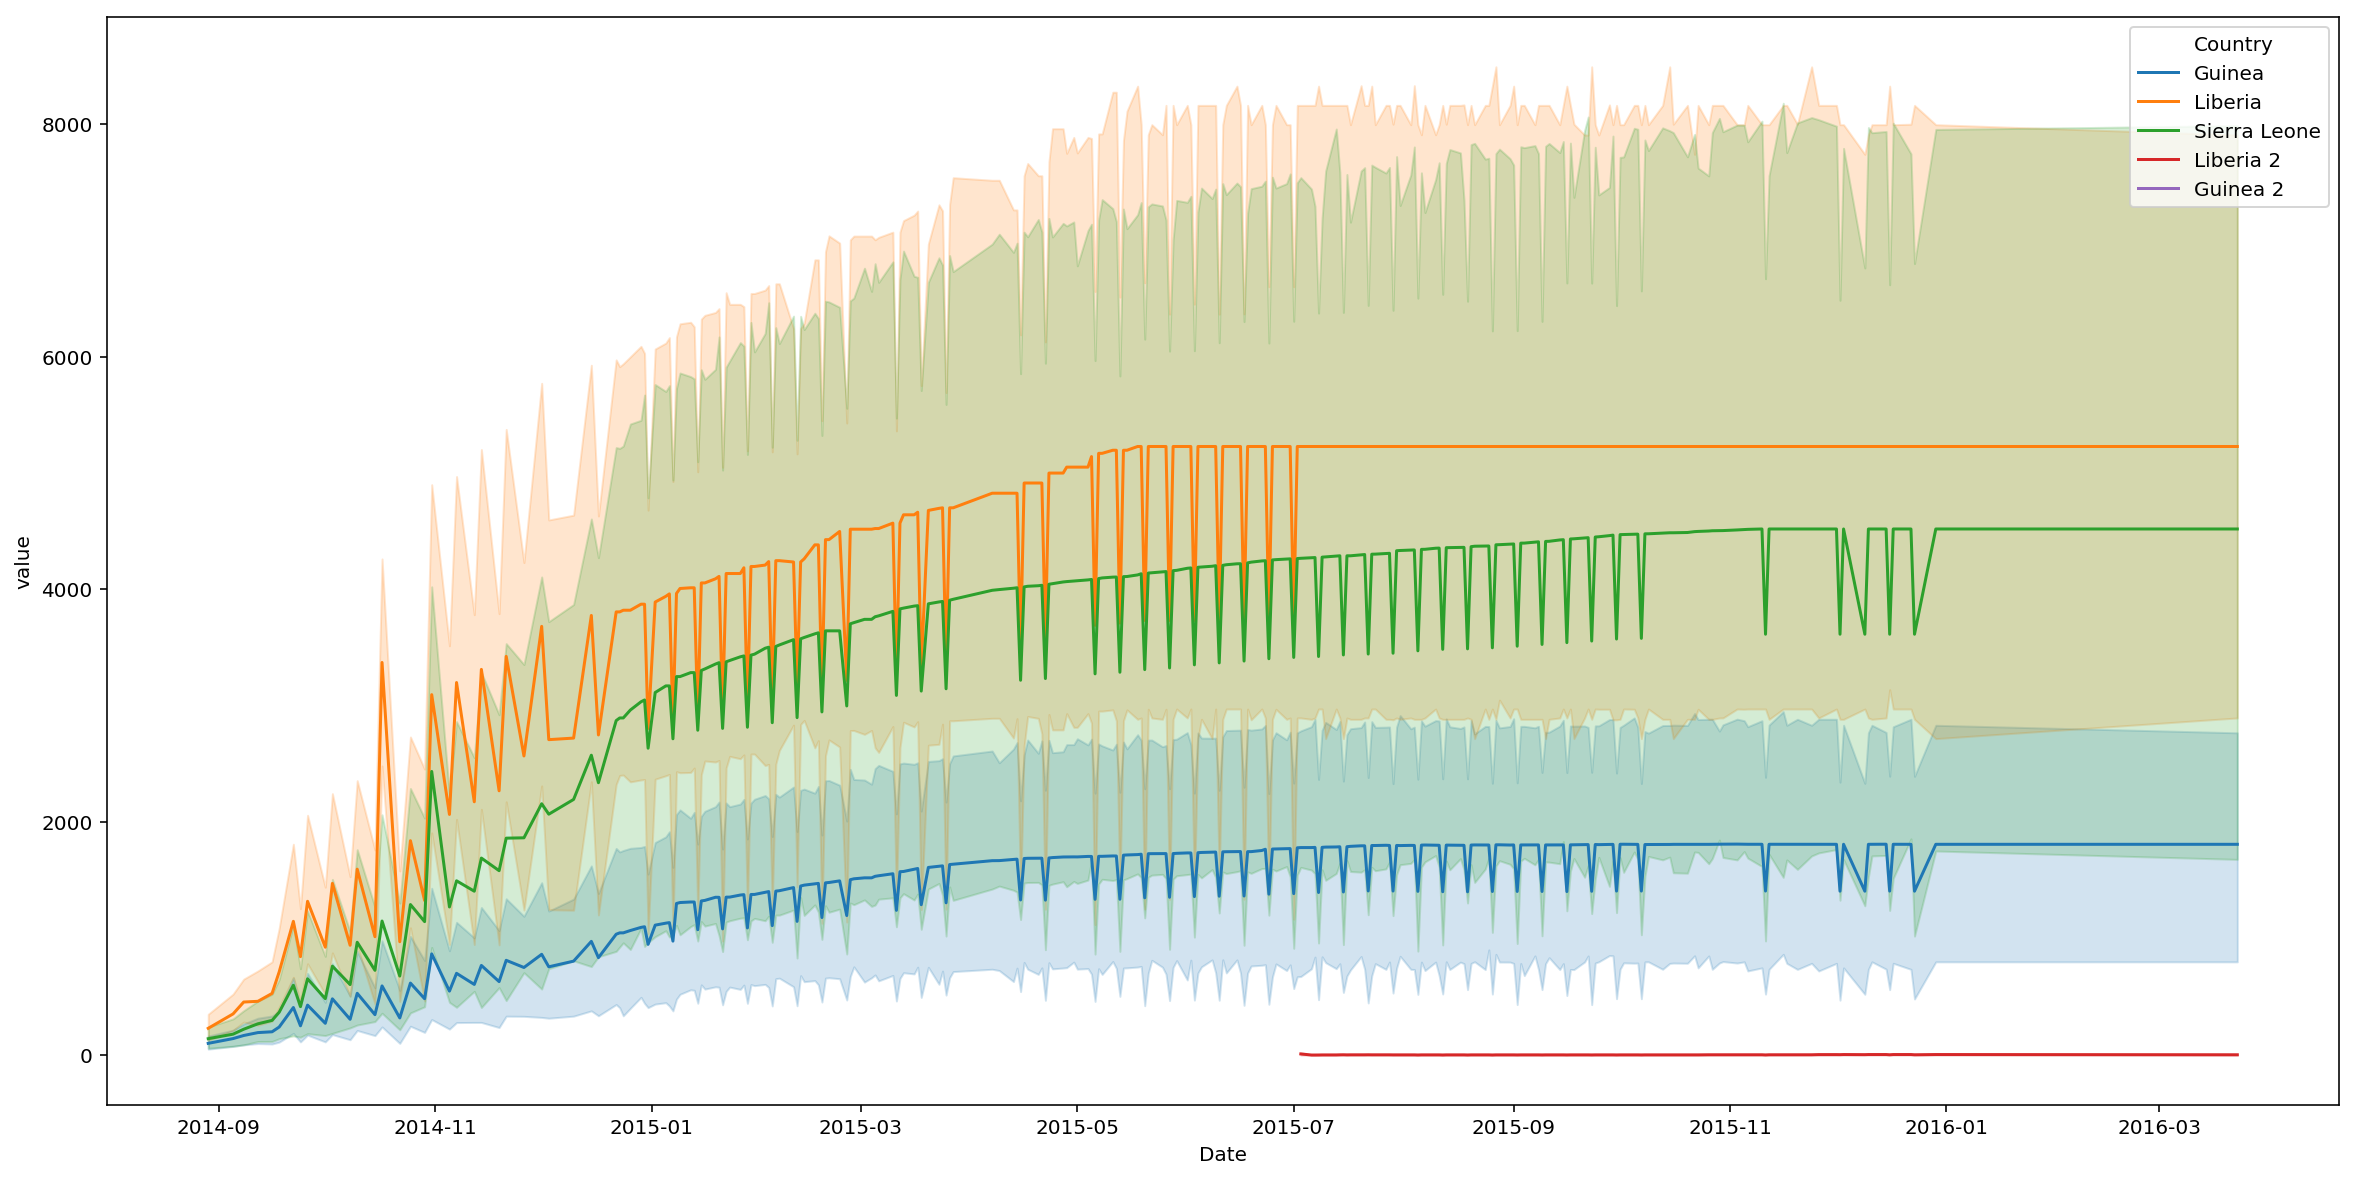

In [13]:
analysisPeaked = ['Guinea 2', 'Sierra Leone', 'Liberia 2', 'Liberia', 'Guinea']

analysisPeaked_df = df[(df.Country.isin(analysisPeaked))]
# analysisPeaked_df.head()


plt.rcParams['figure.figsize'] = [20, 10]
sns.lineplot(data = analysisPeaked_df, x = "Date", y = "value", hue = "Country")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


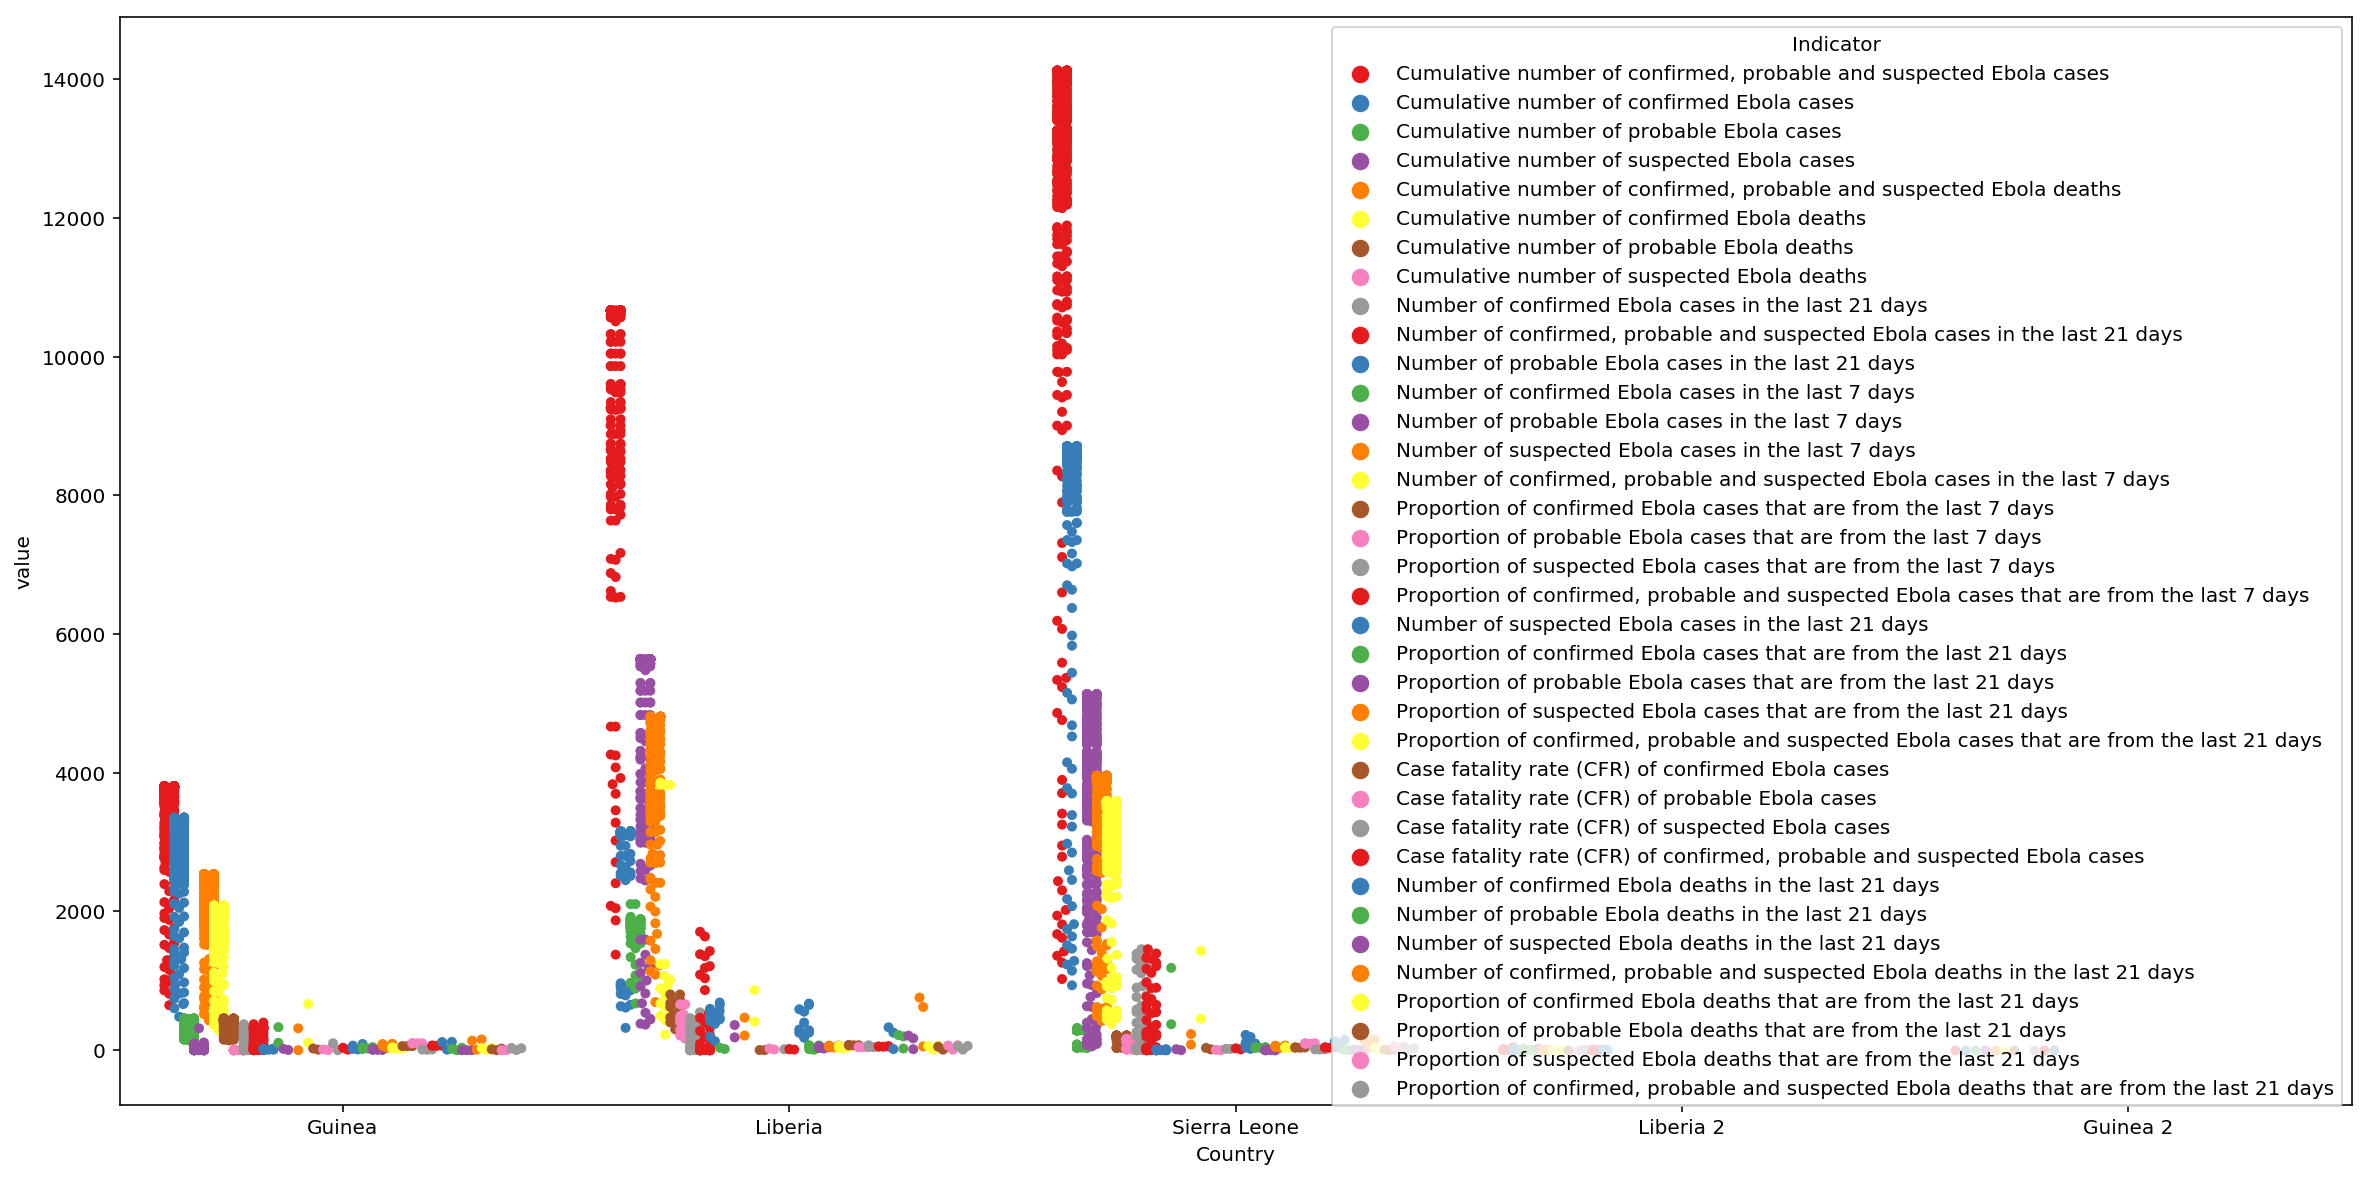

In [14]:
sns.swarmplot(x="Country",y="value",hue='Indicator',data=analysisPeaked_df,palette="Set1", split=True)

The peak of each of the countires varied between all three. The peak is shown in the swarmplot from lowest to highest starting with Guinea, Liberia, and Sierra Leone. Guinea peaked between 2000 & 4000 of the reported values. Liberia peaked between 10000 & 12000 and Sierra Leone peaked between 14000 & 14200 

###  Cumulative of the Ebola outbreak

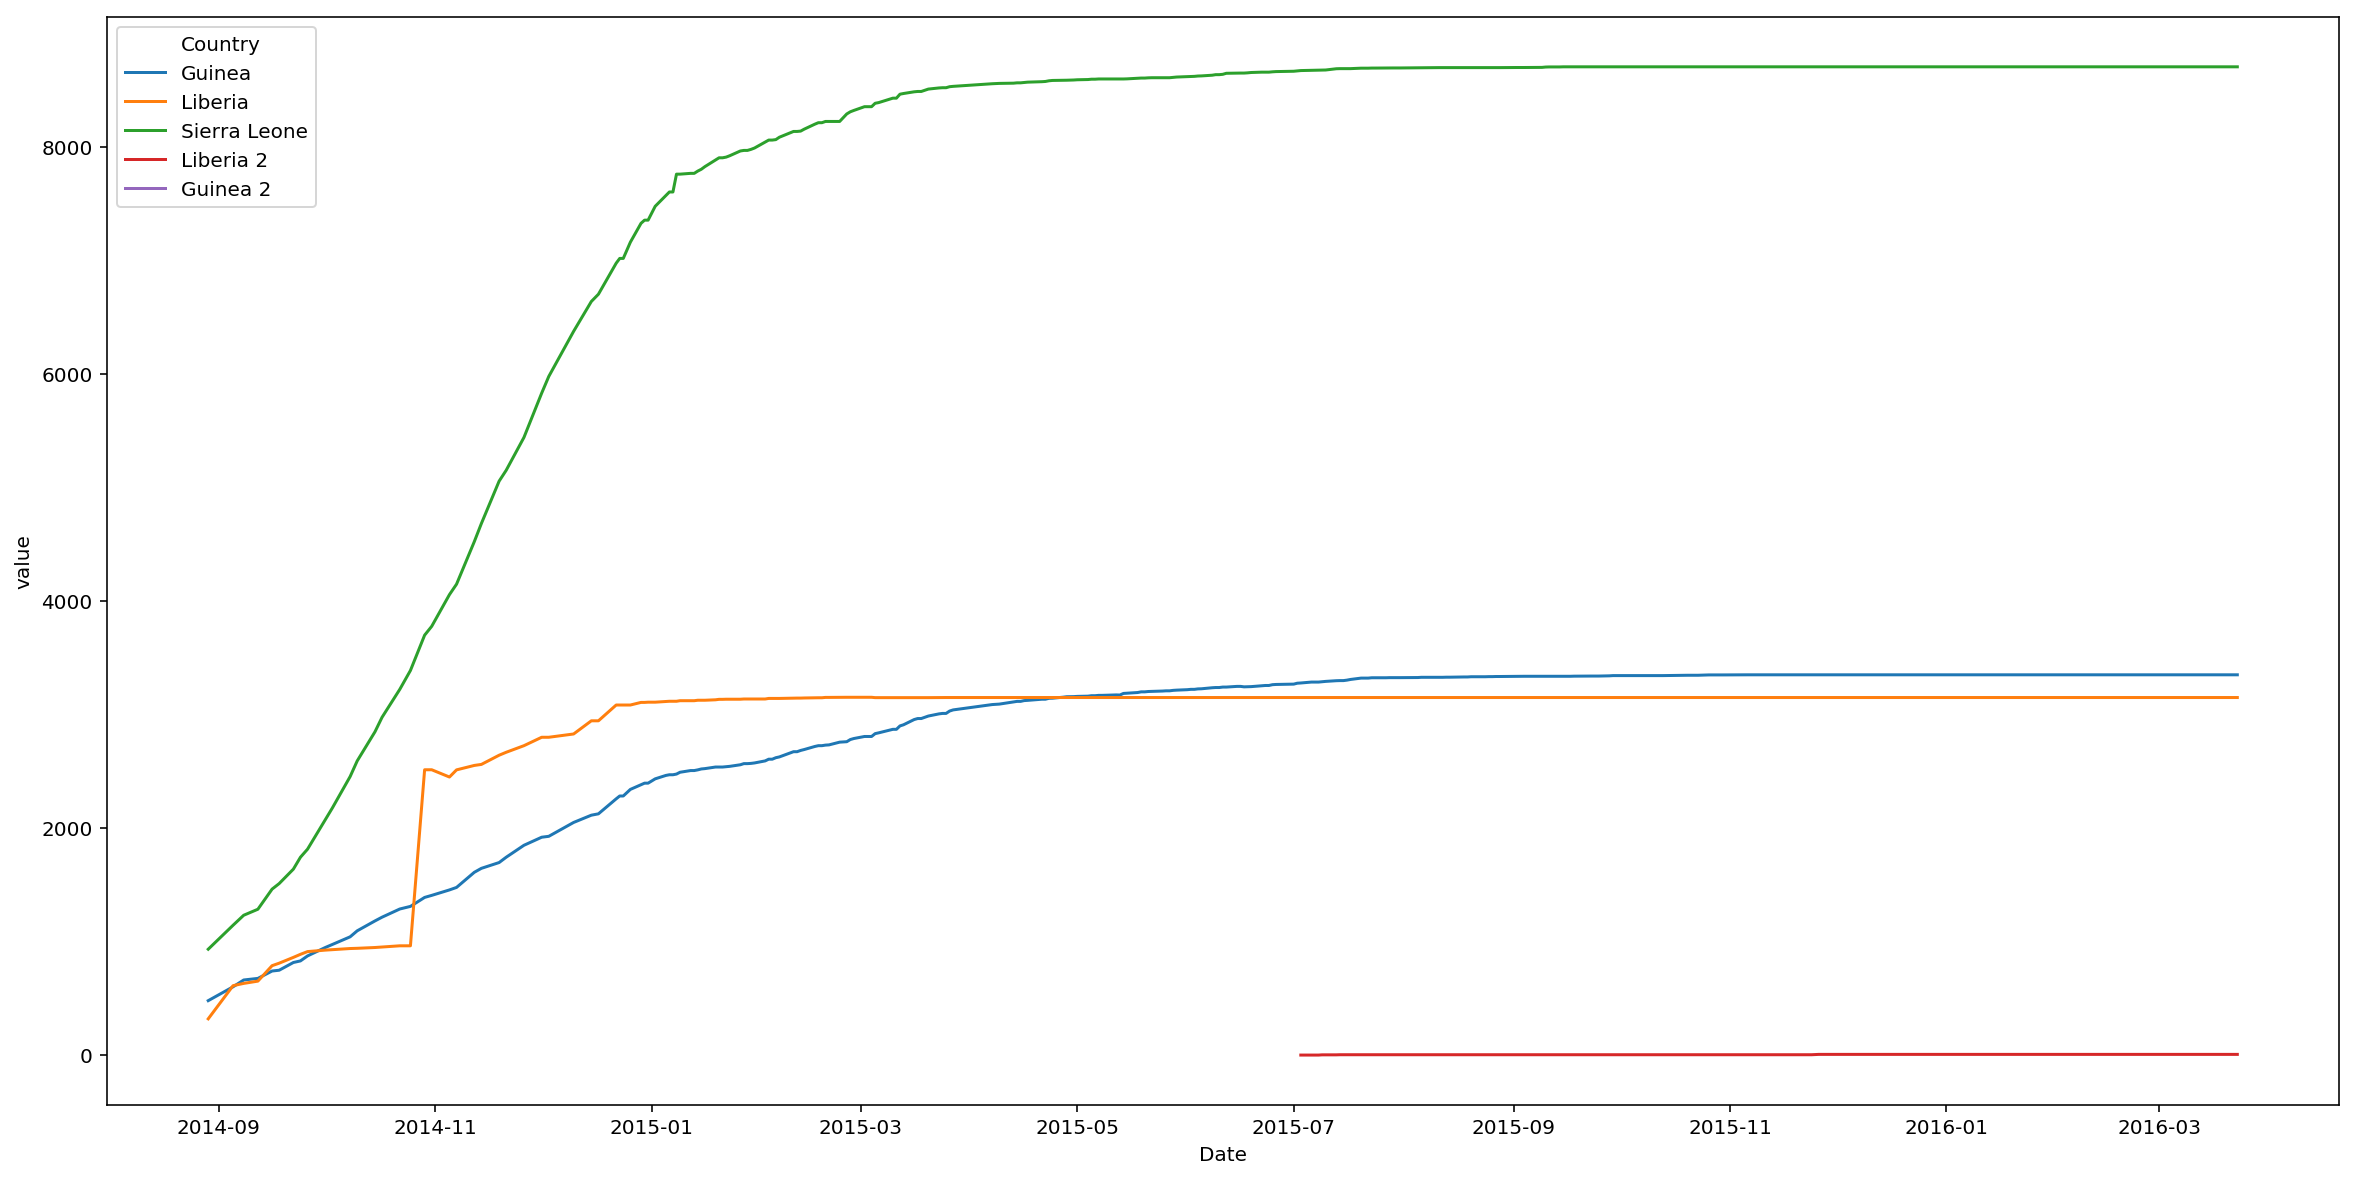

In [15]:
comparativeAnalysis = ['Guinea 2', 'Sierra Leone', 'Liberia 2', 'Liberia', 'Guinea']
comparativeAnalysis_df = df[(df.Country.isin(comparativeAnalysis)) & (df.Indicator == 'Cumulative number of confirmed Ebola cases')]

sns.lineplot(data = comparativeAnalysis_df, x = "Date", y = "value", hue = "Country")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


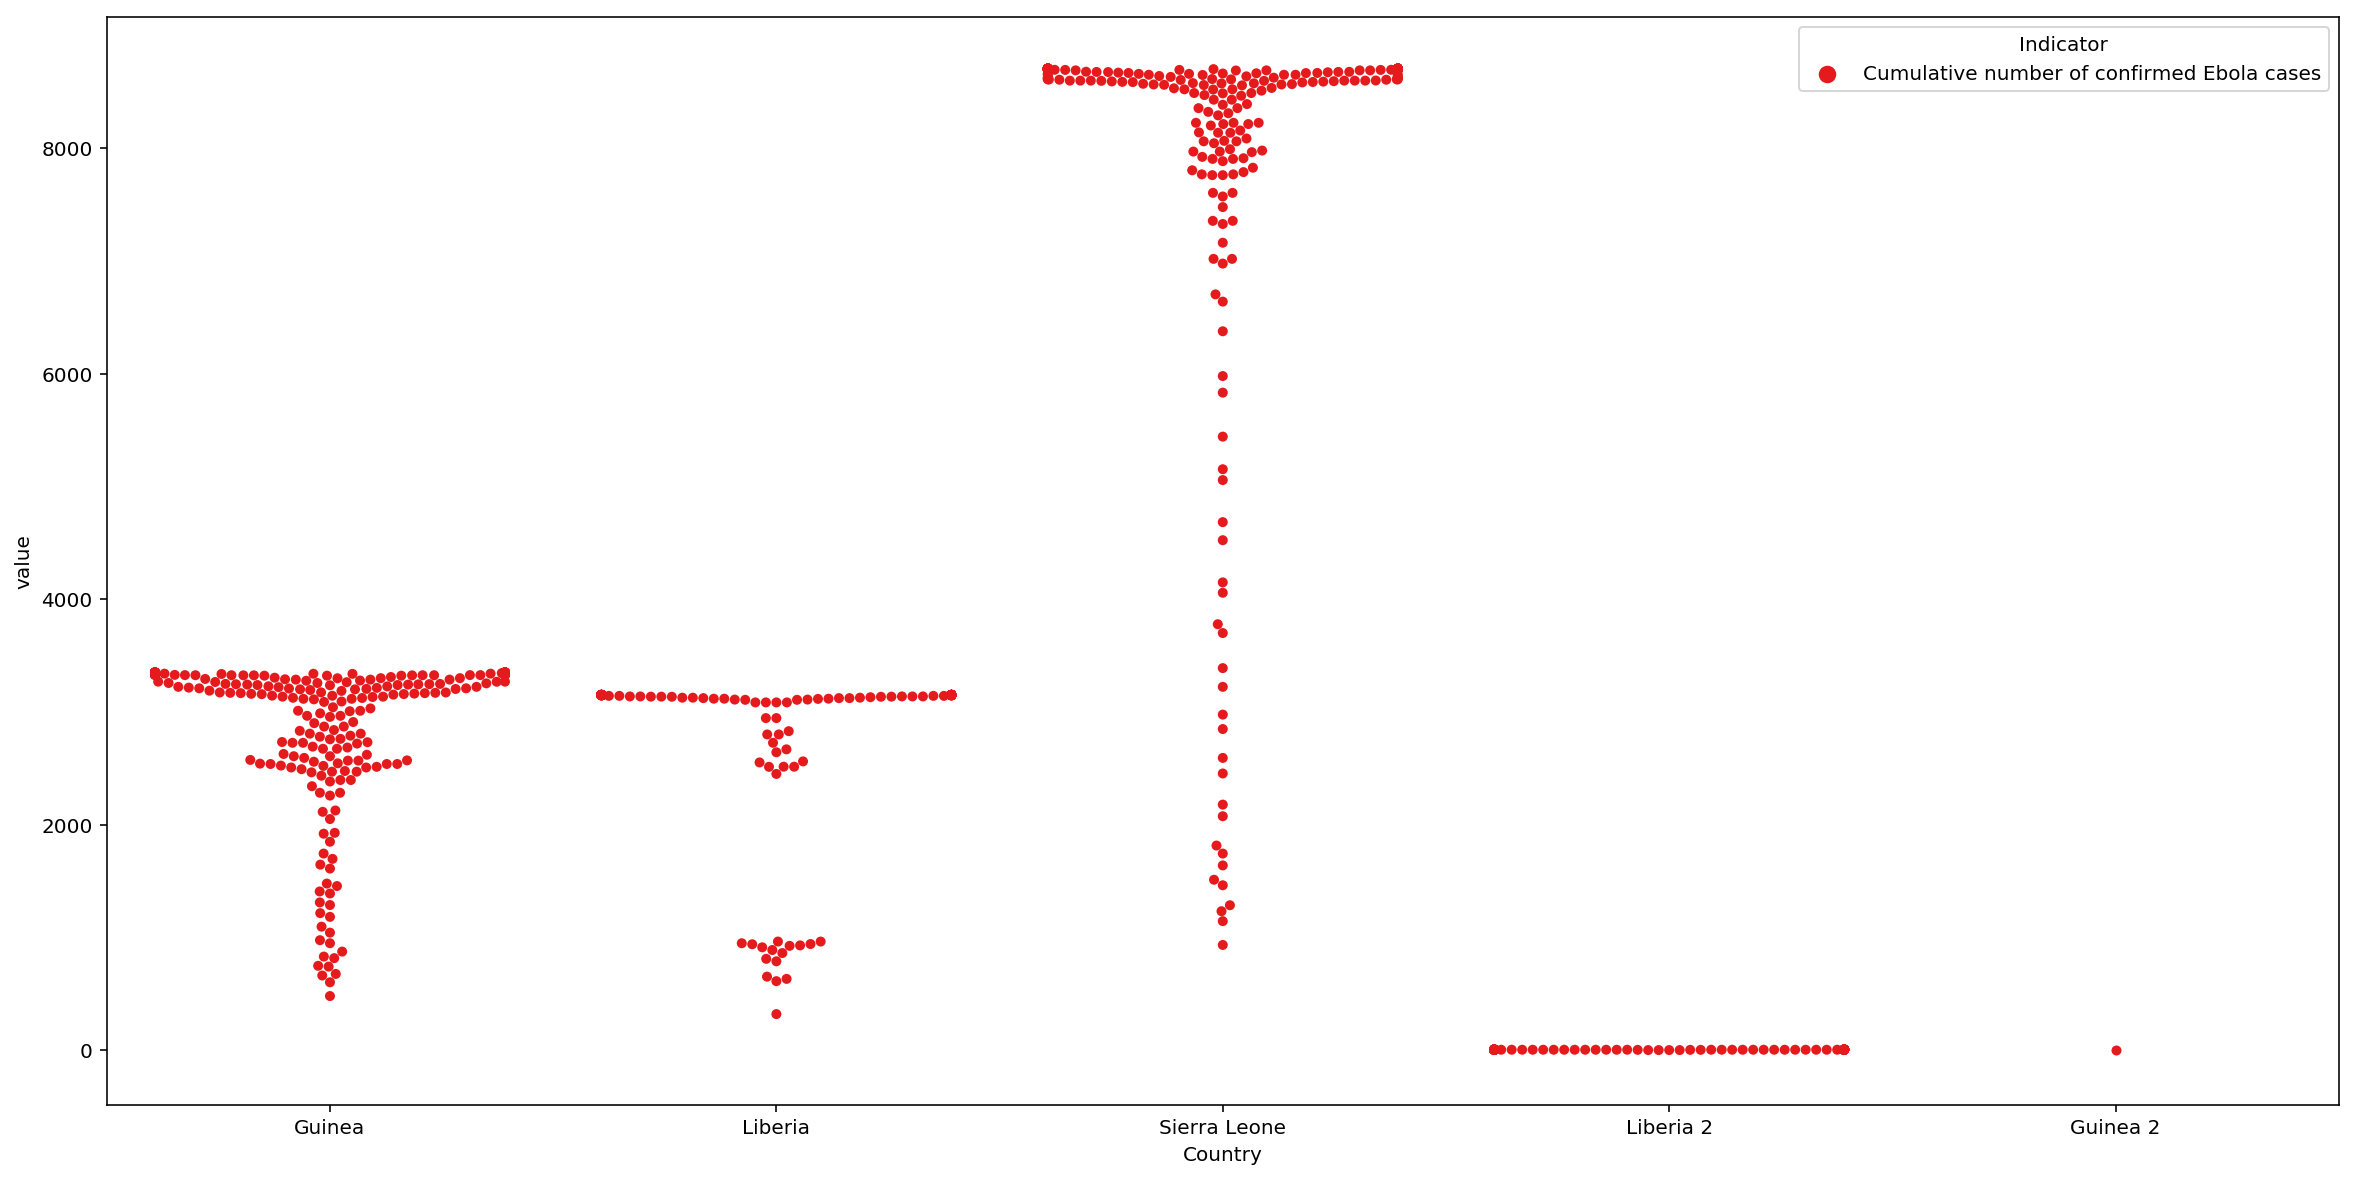

In [16]:
# comparativeAnalysis_df = df[(df.Indicator.isin(comparativeAnalysis))]
sns.swarmplot(x="Country",y="value",hue='Indicator',data=comparativeAnalysis_df,palette="Set1", split=True)

The outbreak hit Sierra Leone more than Guinea and Liberia. The outbreak peaked for Sierra Leone between the dates of 2015-01 & 2013-03 and remained constant 2015-07 to 2016-03. The swarmplot shows a cluster for Sierra Leone between 7000 & 8500 in the value's representation. Guinea shows a cluster in the plot between 2000 & 3700. Guinea and Liberia remained constant from 2015-05 to 2016-03. 

###  New Cases of the Ebola outbreak

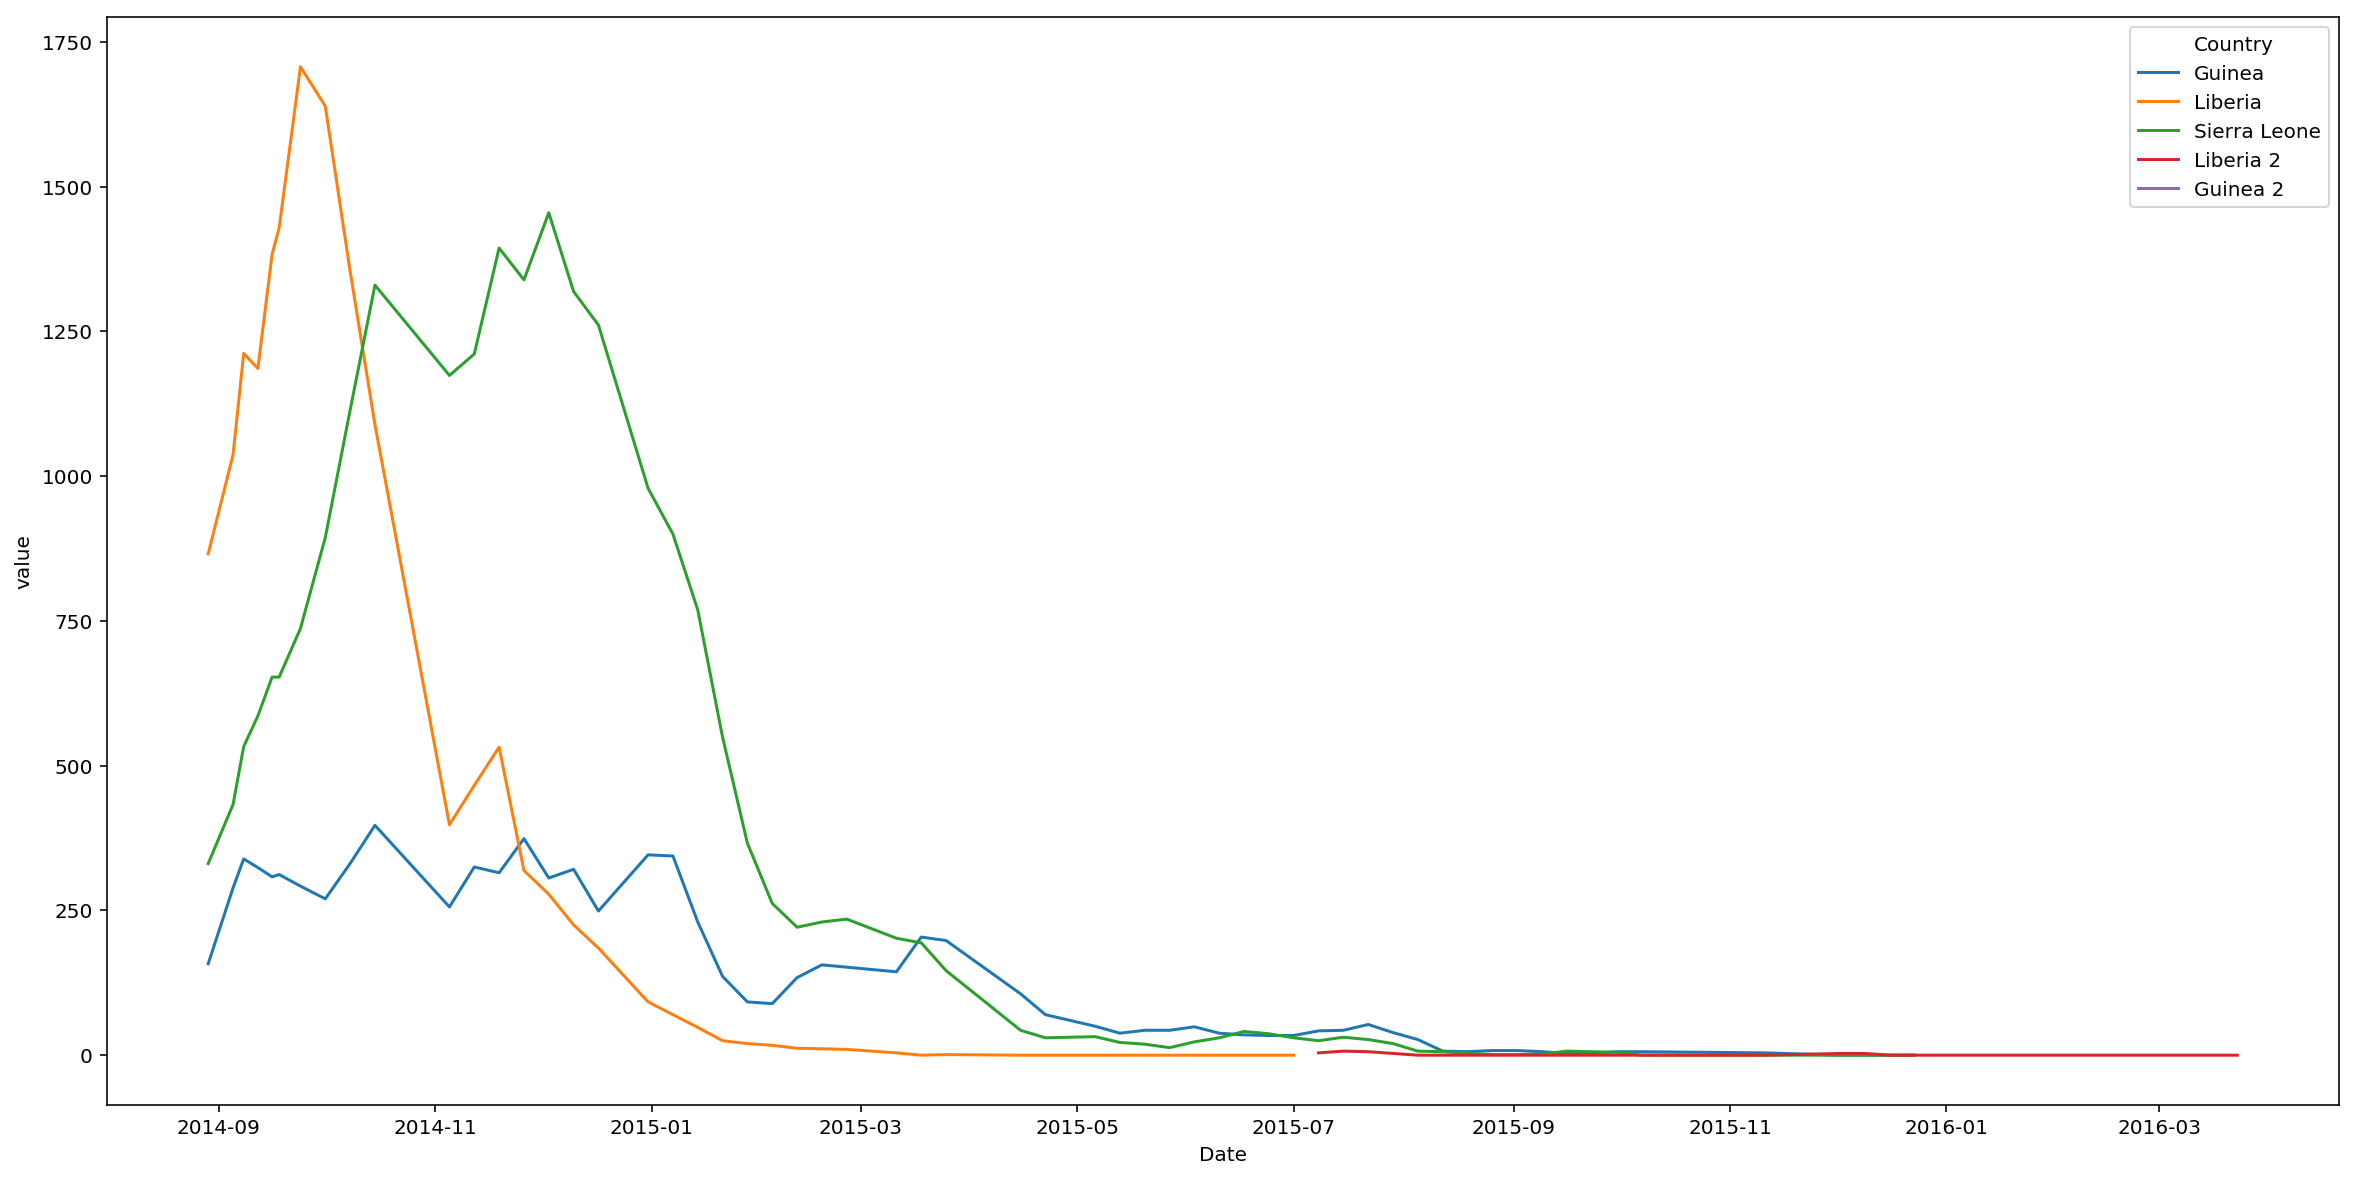

In [17]:
comparativeAnalysis = ['Guinea 2', 'Sierra Leone', 'Liberia 2', 'Liberia', 'Guinea']

comparativeAnalysis_df = df[(df.Country.isin(comparativeAnalysis)) & (df.Indicator == 'Number of confirmed, probable and suspected Ebola cases in the last 21 days')]
sns.lineplot(data = comparativeAnalysis_df, x = "Date", y = "value", hue = "Country")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


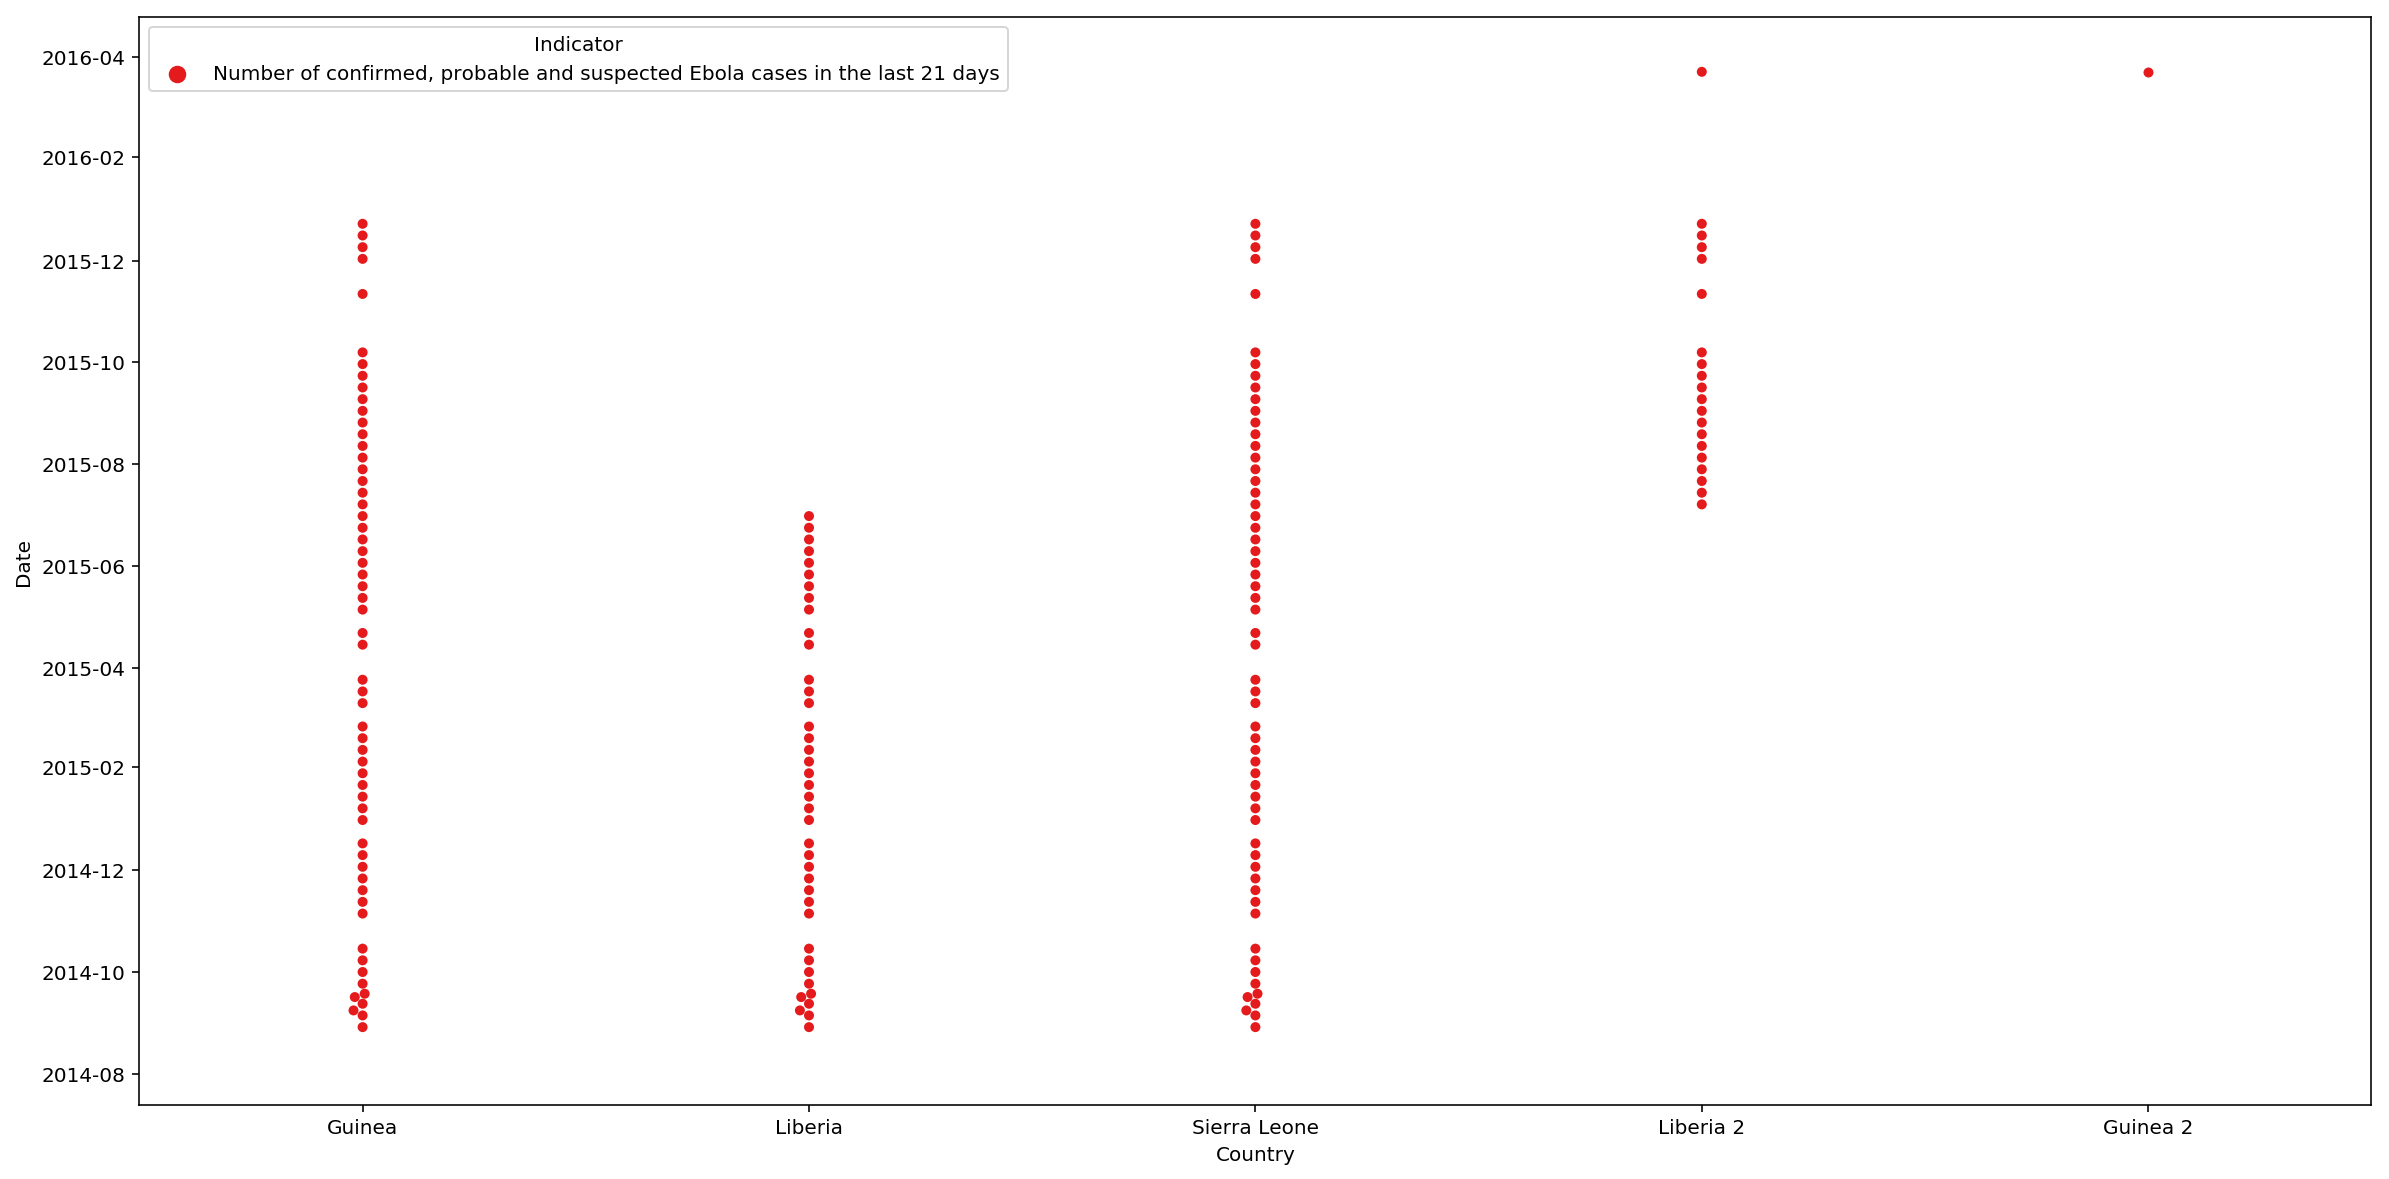

In [18]:
sns.swarmplot(x="Country",y="Date",hue='Indicator',data=comparativeAnalysis_df,palette="Set1", split=True)

The swarmplot shows new cases for Liberia 2 and Guinea 2 between the dates of 2016-02 & 2016-04. Liberia 2 and Guinea 2 seem to be the outliers in the datset. Guinea shows between the dates of 2015-04 to 2015-10 a constant influx of cases reported this also applies to Sierra Leone. The lineplot shows a peak trend between the dates of 2014-09 & 2015-01 for Guinea, Liberia, and Sierra Leone then they dip between 2015-01 & 2015-03. 